In [1]:
# Importamos los paquetes necesarios
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
import io
import utils as ut
import importlib

## 1. Carga del dataset

In [2]:
data_path = '../data/diabetes_prediction_dataset.csv'
data = pd.read_csv(data_path, sep=',')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Por último, tenemos _blood\_glucose\_level_ que a pesar de ser una variable entera, se considera como una variable contínua, debido al gran número de categorías que harían falta para describirla si no. El resto de variables son variables contínuas de por sçi (aunque la edad se podría de nuevo considerar categórica, pero esto no sería útil).  

Observando los estadisticos del `.describe()`, podemos intuir la proporción de individuos con problemas cardíacos con un $3.94\%$, aquellos con diabetes conforman el $8.5\%$ y los que tienen hipertensión son el $7.49\%$.

## 1.1. Inspección inicial

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Creamos una lista con las variables numéricas, dejando de lado a diabetes ya que es nuestra variable objetivo y otro con las variables categóricas.

In [4]:
numeric_var = data.select_dtypes(include='number').columns.tolist()
numeric_var.remove('diabetes')
numeric_var

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [ ]:
categoric_var = [var for var in data.columns.tolist() if var not in numeric_var]
categoric_var

['gender', 'smoking_history', 'diabetes']

#### Primeras impresiones

En primer lugar vamos a observar el tipo de datos que tenemos en búsqueda de errores de formato, _missing values_ u otro tipo de inconsistencias en el _data frame_.

Tenemos un dataset con 100.000 observaciones, se ve que sólo existen dos columnas que no son numéricas, estas son el **género y la historia como fumador (o no)**. Estas dos columnas serán tratadas como variables categóricas, asi como también la variable objetivo.

- **No hay missing values explícitos** -> PERO no garantiza ausencia de “missing lógicos”

## 2. Análisis de variables
### 2.1 Análisis univariante, variables numéricas.
Definimos colores y tamaños de los gráficos

In [6]:
color_general = 'steelblue'
color_mean = 'red'
color_median = 'black'
fig_size_histogram = (5,4)
fig_size_box_plot = (3,4)
fig_size_desc = (2,4)

### Age

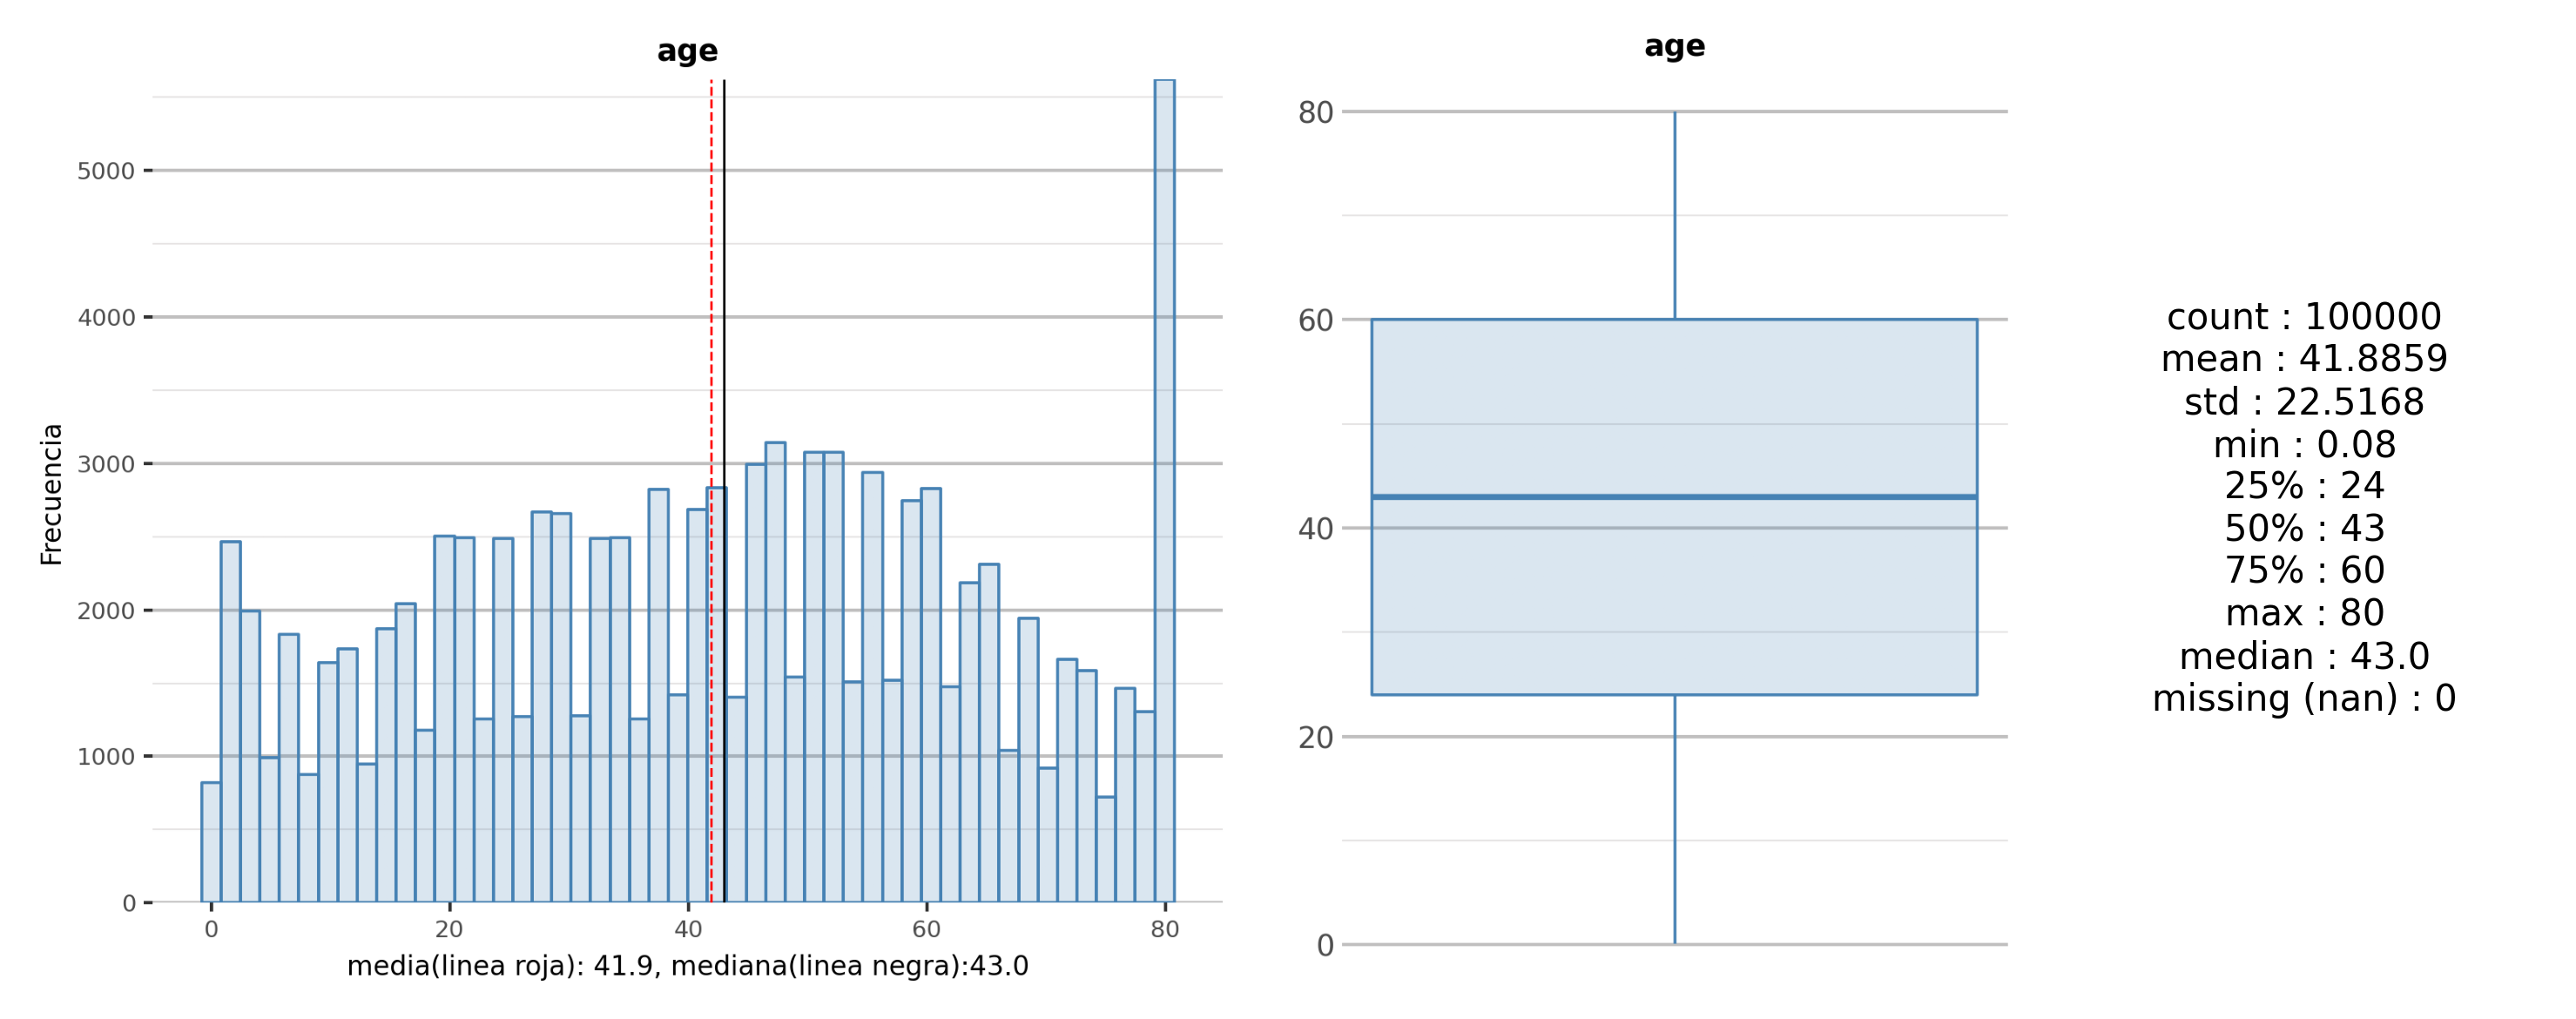

In [7]:
col = numeric_var[0]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

Observamos con estas gráficas cómo la distribución de la variable edad, aunque en el *boxplot* no se observa ningún *outlier*, sí que podemos observar como el número de cuentas del rango de edad con $80$ años es muy grande, mucho myor que el de cualquier otro grupo de edad. Esto puede ser importante a la hora de hacer un modelo ya que al tener tantas observaciones de ese grupo, las conclusiones estarán sesgadas para predecir especialmente bien en dicho grupo.


- La edad presenta un rango amplio (0.08–80 años), coherente con una población general que incluye desde recién nacidos hasta adultos mayores.
- La media (≈41.8) y la mediana (43) son muy próximas, lo que indica ausencia de asimetrías extremas.
- La distribución es relativamente homogénea, sin picos anómalos ni concentraciones artificiales.
- No se detectan outliers extremos ni valores clínicamente imposibles.
- La variabilidad observada es elevada (std ≈22.5), esperable dada la heterogeneidad de edades.
- La variable no requiere tratamiento previo para el análisis bi-variante

### hypertension

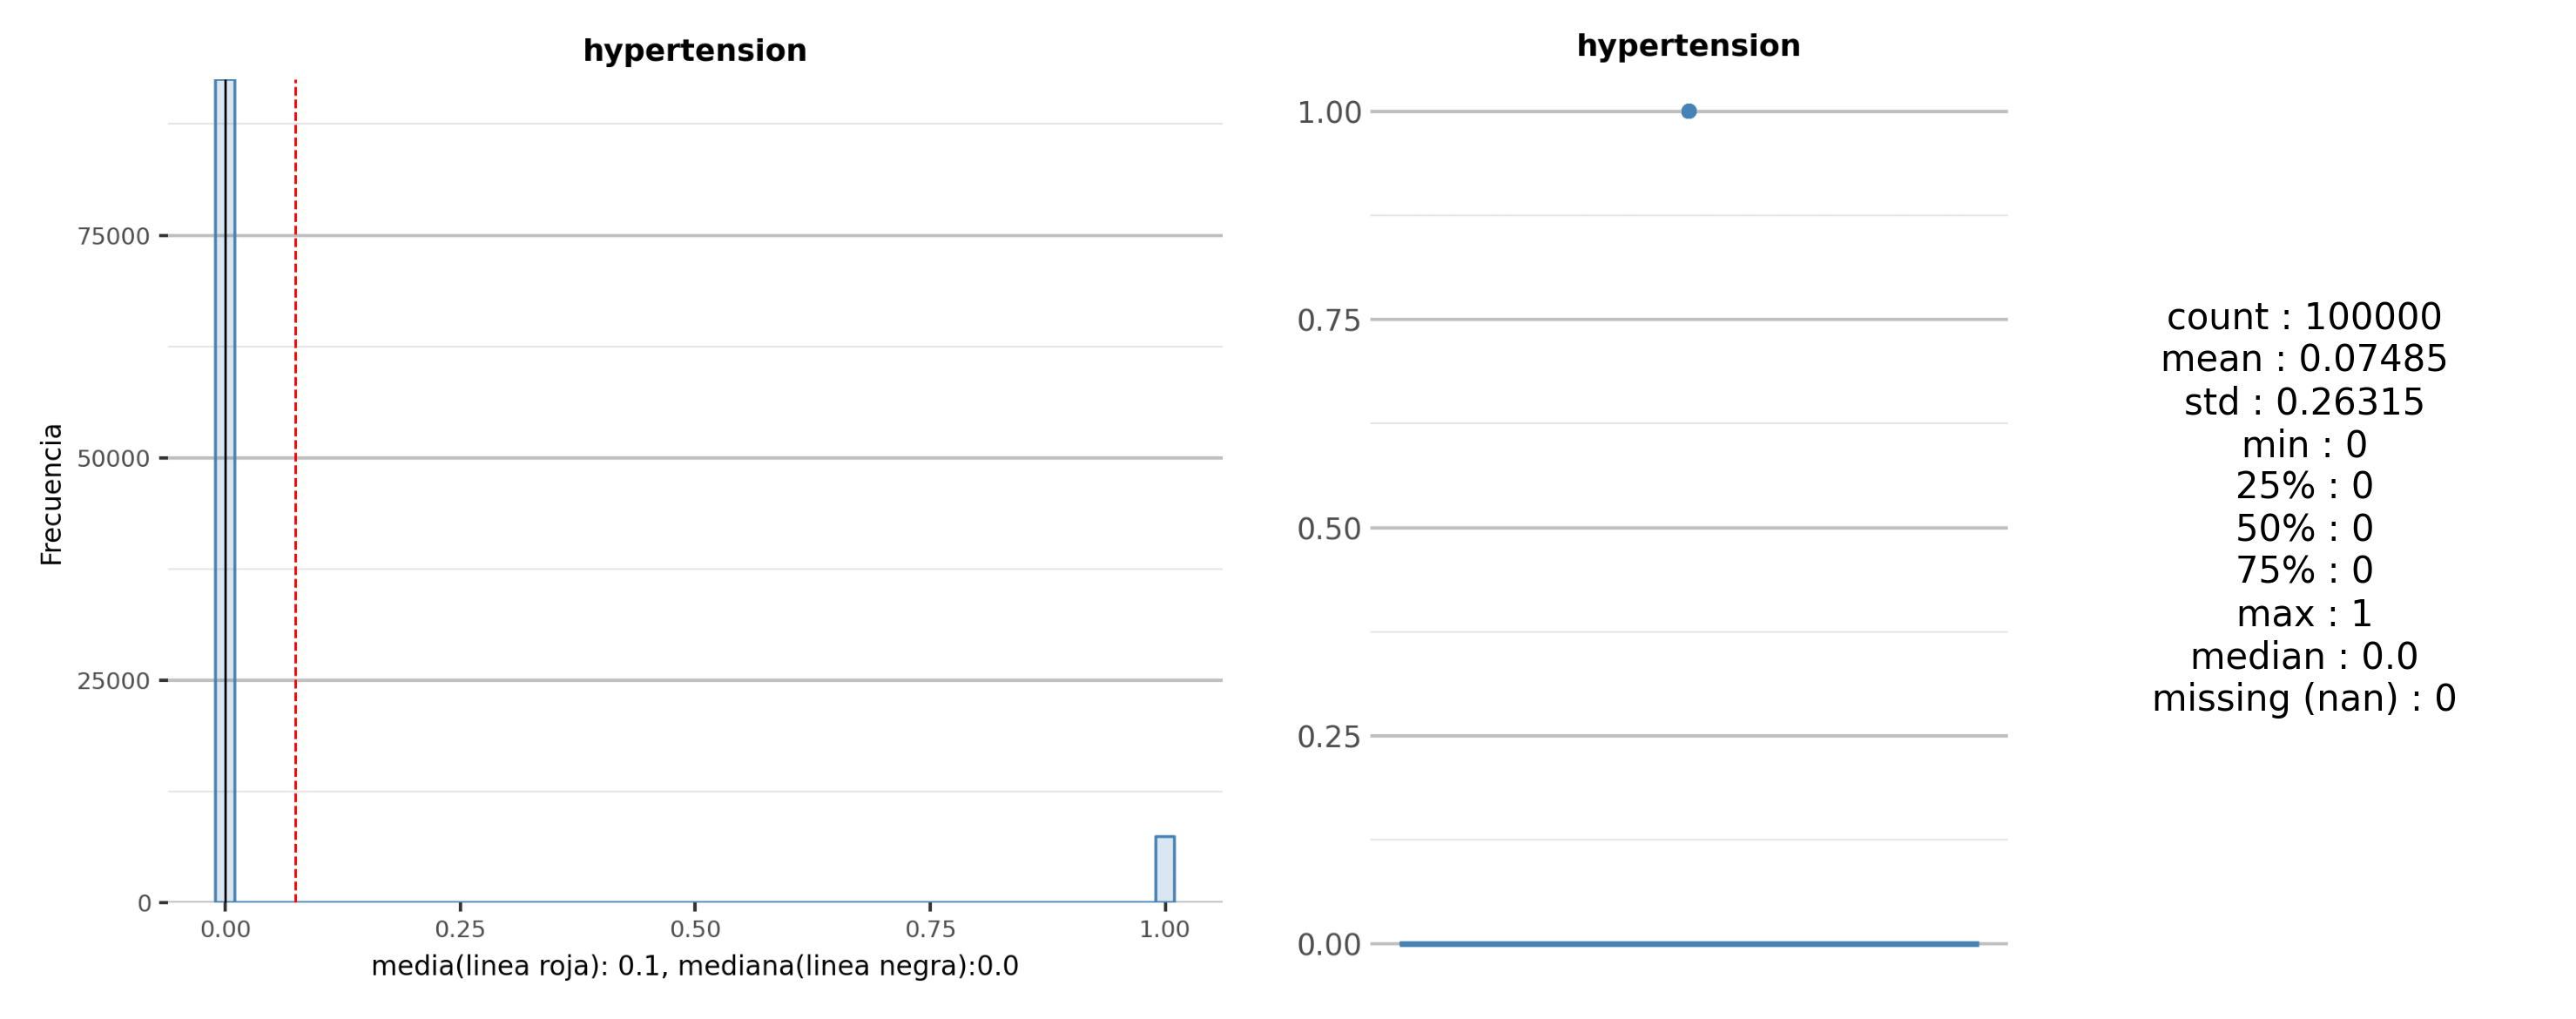

In [19]:
col = numeric_var[1]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

_hypertension_ es numérica pero solo toma los valores de $(0,1)$,  o `False`/`True`, en consecuencia de ahora en adelante de tratara como una variable categórica.

In [ ]:
categoric_var.append('hypertension')
numeric_var.remove('hypertension')

### heart_disease

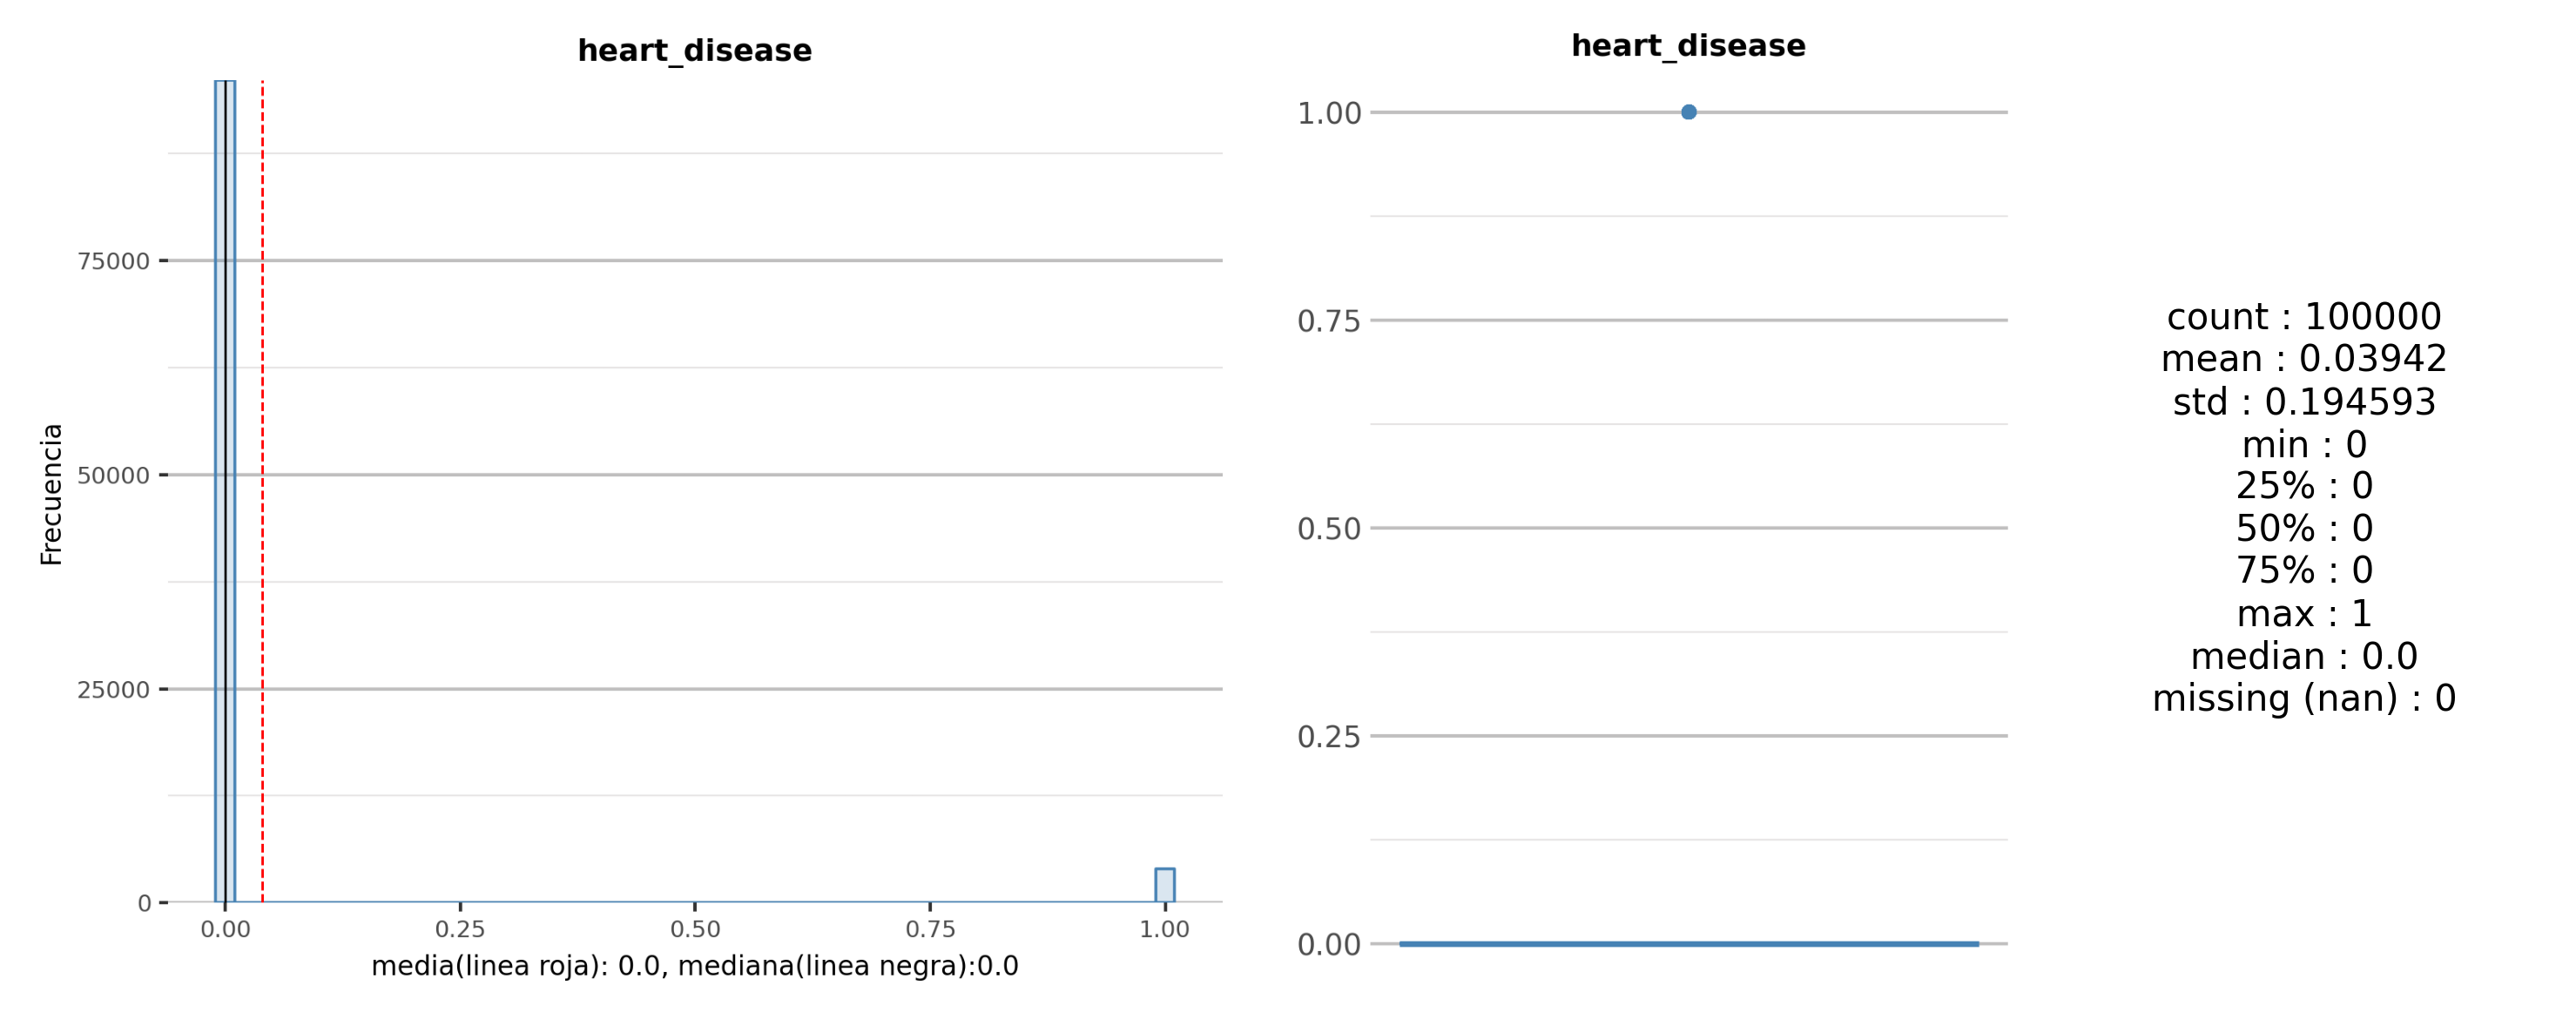

In [20]:
col = numeric_var[2]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

_heart_disease_ es numérica pero solo toma los valores de $(0,1)$,  o `False`/`True`, en consecuencia de ahora en adelante de tratara como una variable categórica.

In [32]:
categoric_var.append('heart_disease')
numeric_var.remove('heart_disease')

### bmi

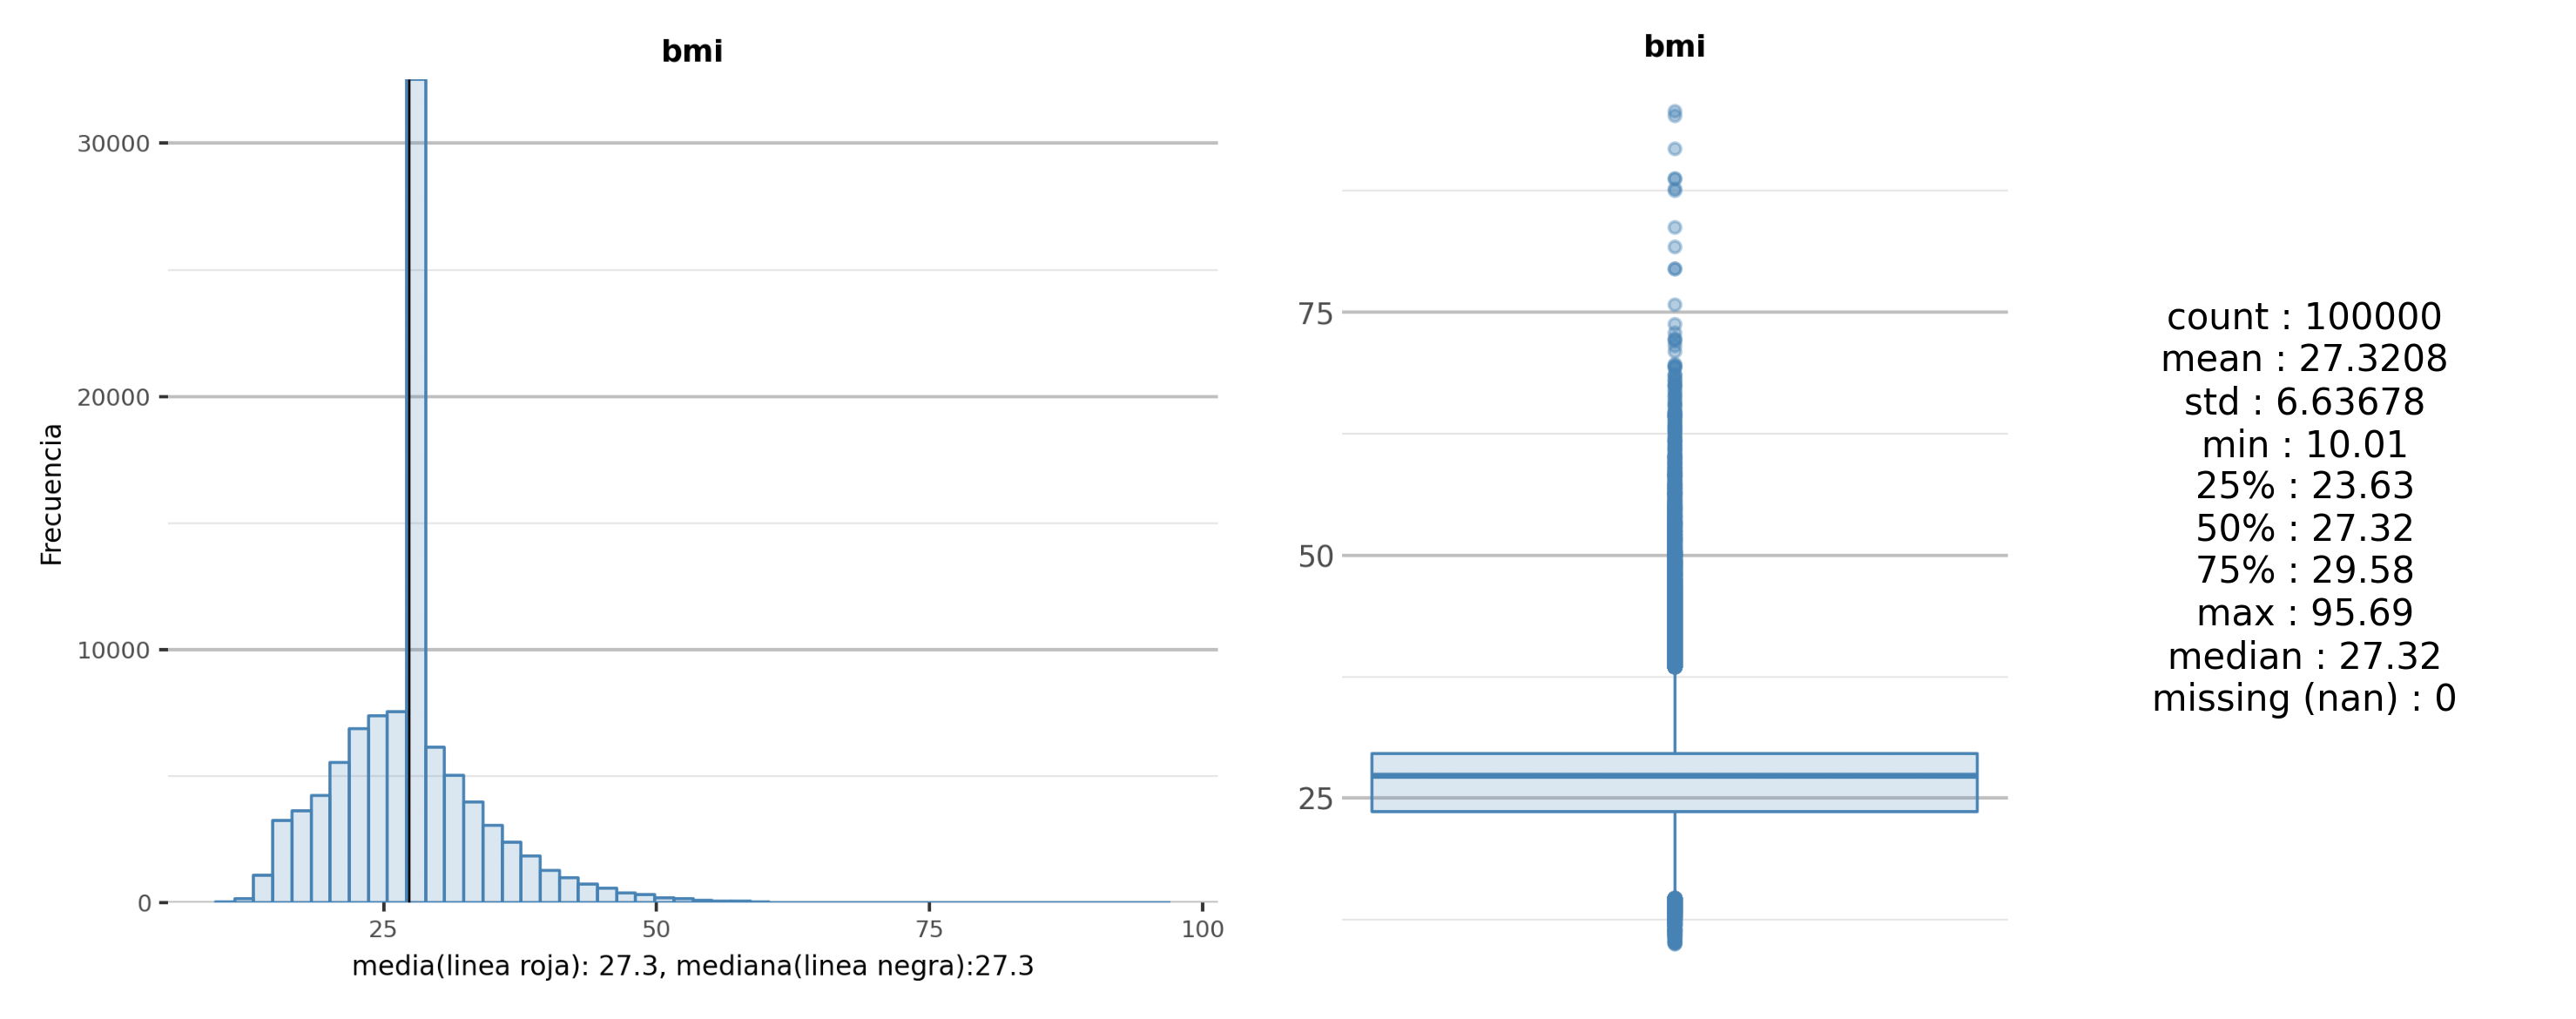

In [21]:
col = numeric_var[3]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

La variable sigue una distribución normal en su histograma,alrededor de 27.3 hay una explosión en el conteo, quizás porque es un valor típico de esta variable en la población general. Existen una serie de *outliers* tanto por encima de la distribución como por debajo.

BMI presenta una distribución concentrada en valores clínicamente plausibles, pero con una cola derecha pronunciada y outliers extremos, que deberán ser tratados en fases posteriores para evitar distorsiones en el análisis.

### HbA1c_level

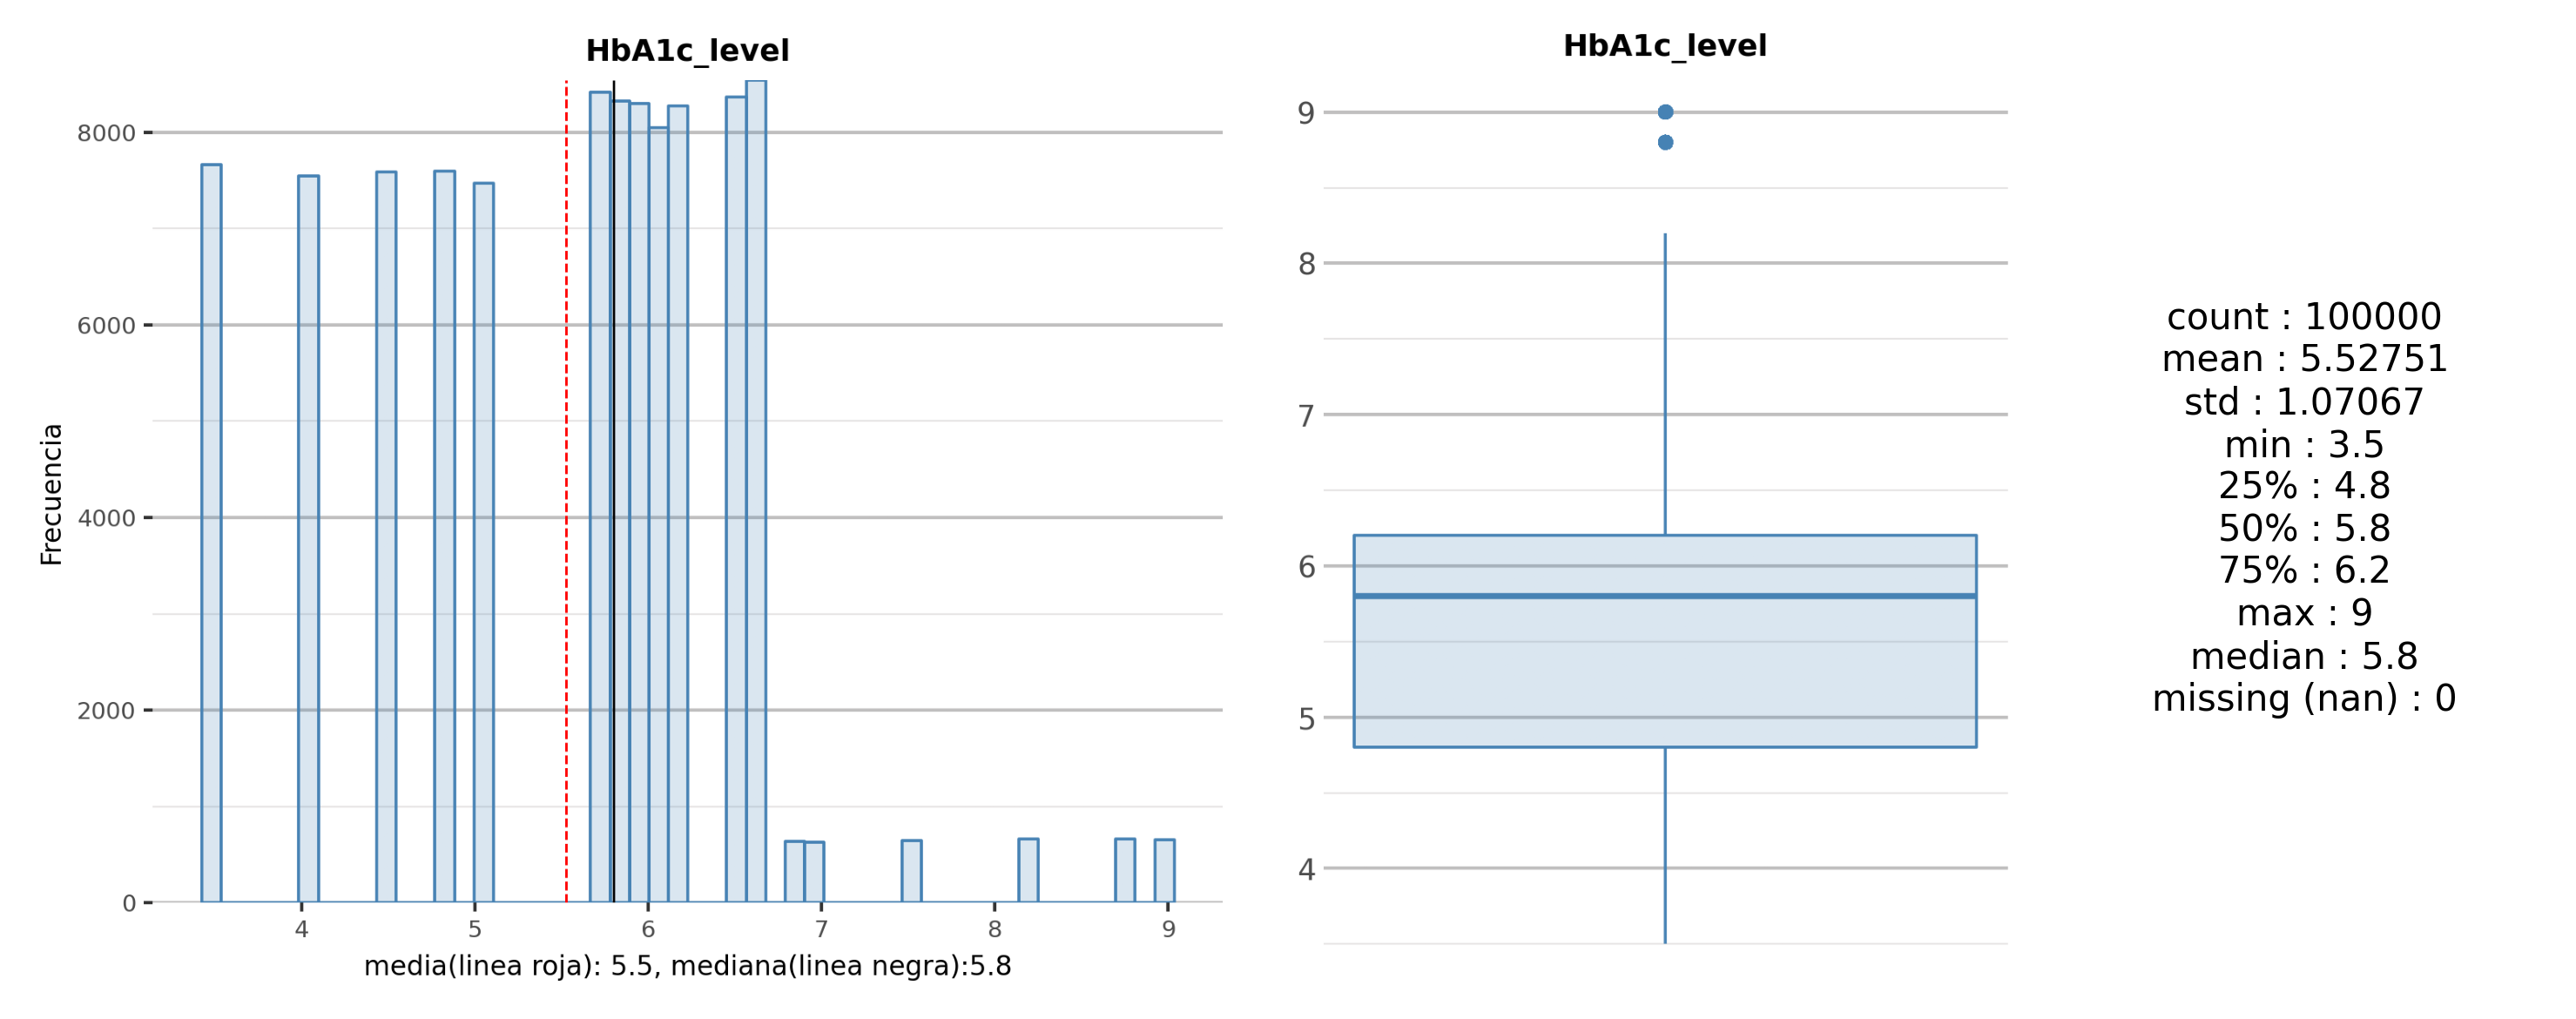

In [22]:
col = numeric_var[4]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

La distribución de esta variable no es continua, ya que solo toma ciertos valores puntuales.

- La variable presenta un rango 3.5–9.0, plenamente coherente con valores clínicos reales.
- La mediana (5.8) es superior a la media (≈5.53), indicando una ligera asimetría a la izquierda.
- La mayor concentración de observaciones se sitúa entre 4.8 y 6.2, rango compatible con población no diabética y prediabética.
- Existen valores altos (≥7) poco frecuentes, compatibles con perfiles diabéticos, sin considerarse outliers erróneos.
- La dispersión es moderada (std ≈1.07), lo que sugiere buena capacidad discriminativa.
- Como consecuencia de que solo toma valores puntuales, procederemos a discretizar la variable, utilizando arboles de decisión.

### blood_glucose_level

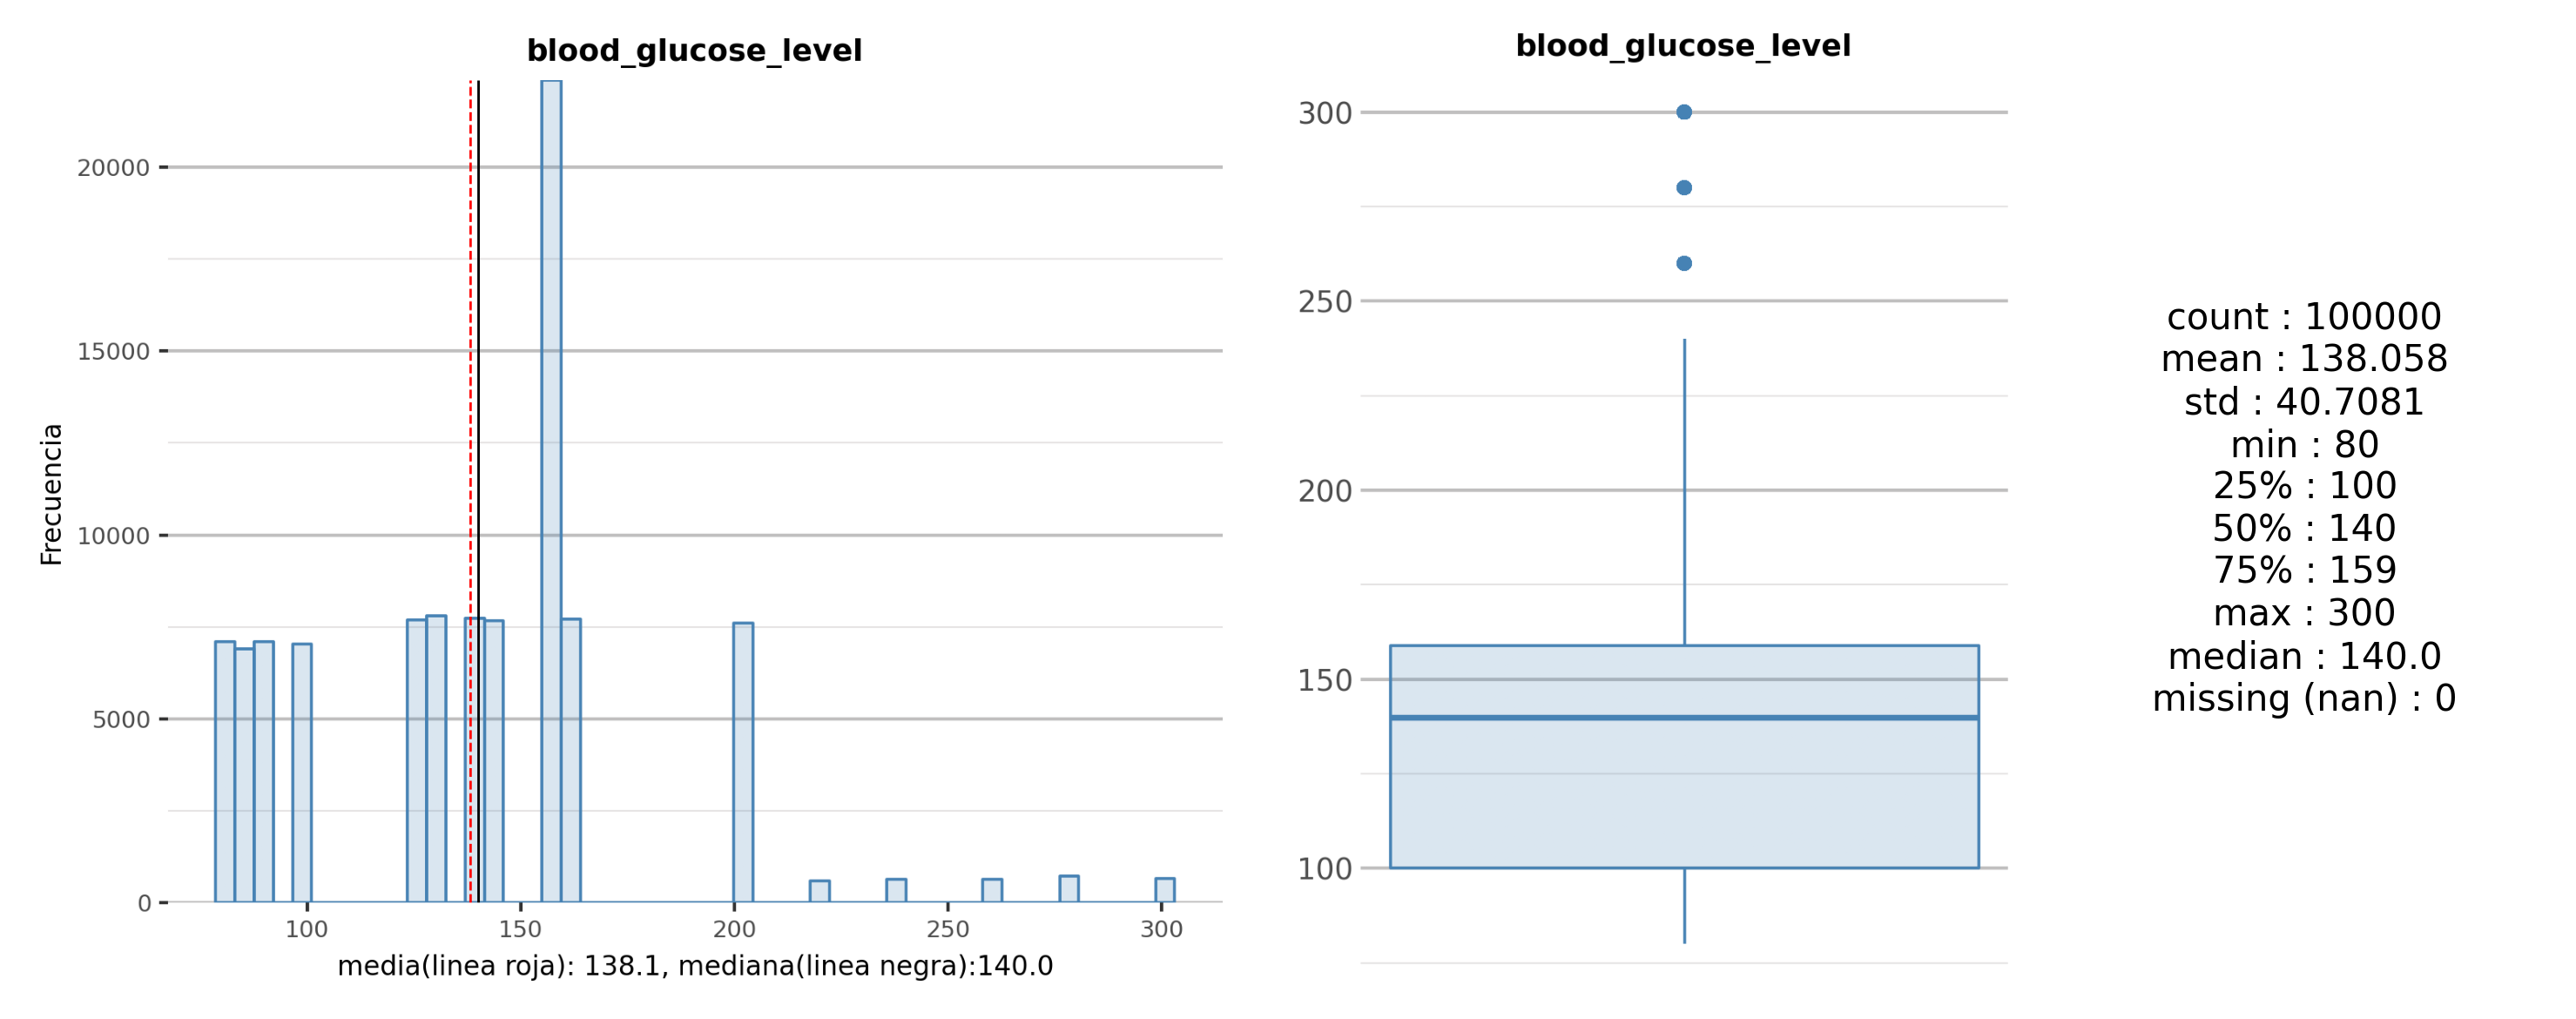

In [23]:
col = numeric_var[5]
histogram_plot = ut.histogram_plot(data,col,color_general,color_mean,color_median,fig_size_histogram)
box_plot = ut.box_plot(data,col,color_general,fig_size_box_plot)
desc_text = ut.desc_plot(data,col)
plot_var_cuantitative = ut.plot_var_cuantitative(histogram_plot,box_plot,desc_text,fig_size_histogram,fig_size_box_plot,fig_size_desc)
plt.tight_layout()
plt.show()

La distribución de esta variable no es continua, ya que solo toma ciertos valores puntuales.

- La variable presenta un rango 80–300, compatible con valores clínicos reales en mediciones puntuales de glucosa.
- La mediana (140) es ligeramente superior a la media (≈138), indicando ligera asimetría a la izquierda.
- La mayor concentración de observaciones se sitúa entre 100 y 160, rango típico de población general y prediabética.
- Existen valores altos (≥200) poco frecuentes, coherentes con episodios hiperglucémicos y perfiles diabéticos.
- La dispersión es elevada (std ≈40.9), lo que sugiere heterogeneidad metabólica en la muestra.
- No se detectan valores imposibles; los extremos observados no se consideran errores, sino casos clínicamente plausibles.

### 2.2 Análisis univariante, variables categóricas.
Definimos colores y tamaños de los gráficos

In [8]:
color_general = 'steelblue'
fig_size = (10,4)

### gender

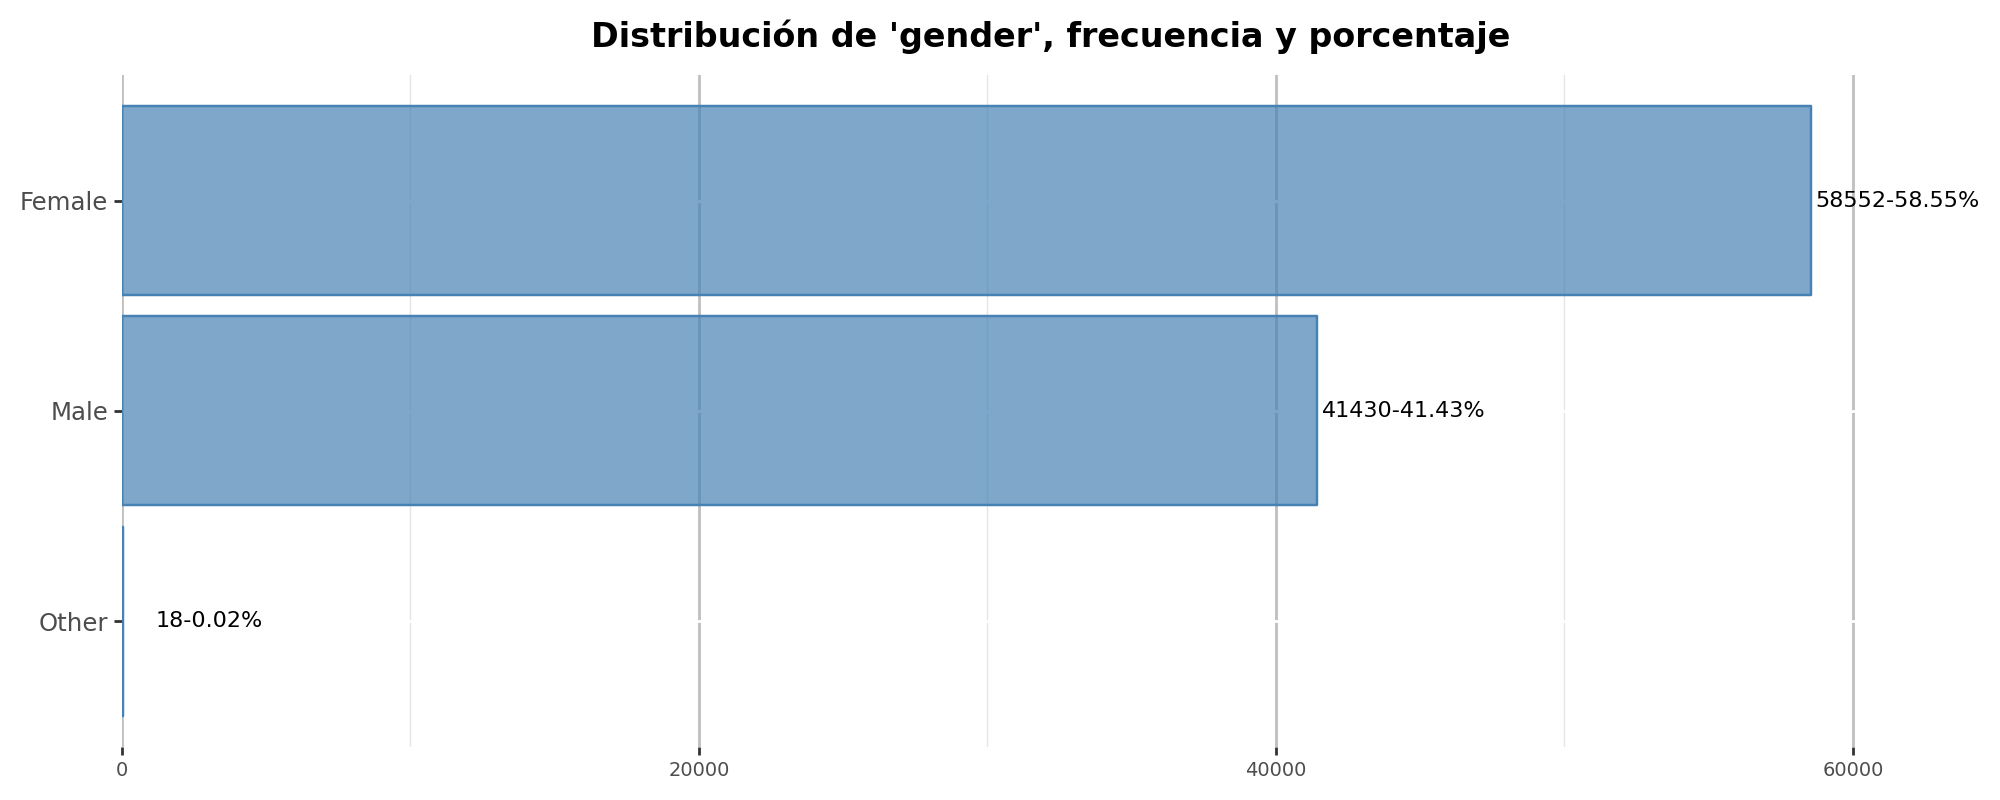

In [33]:
col = categoric_var[0]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,3000)
bar_plot.show()

Lo que podemos observar es la presencia de un género `Other` cuyas observaciones son irrisorias respecto a los géneros masculino y femenino y por esta razón buscaremos eliminaremos estas observaciones.

### smoking_history

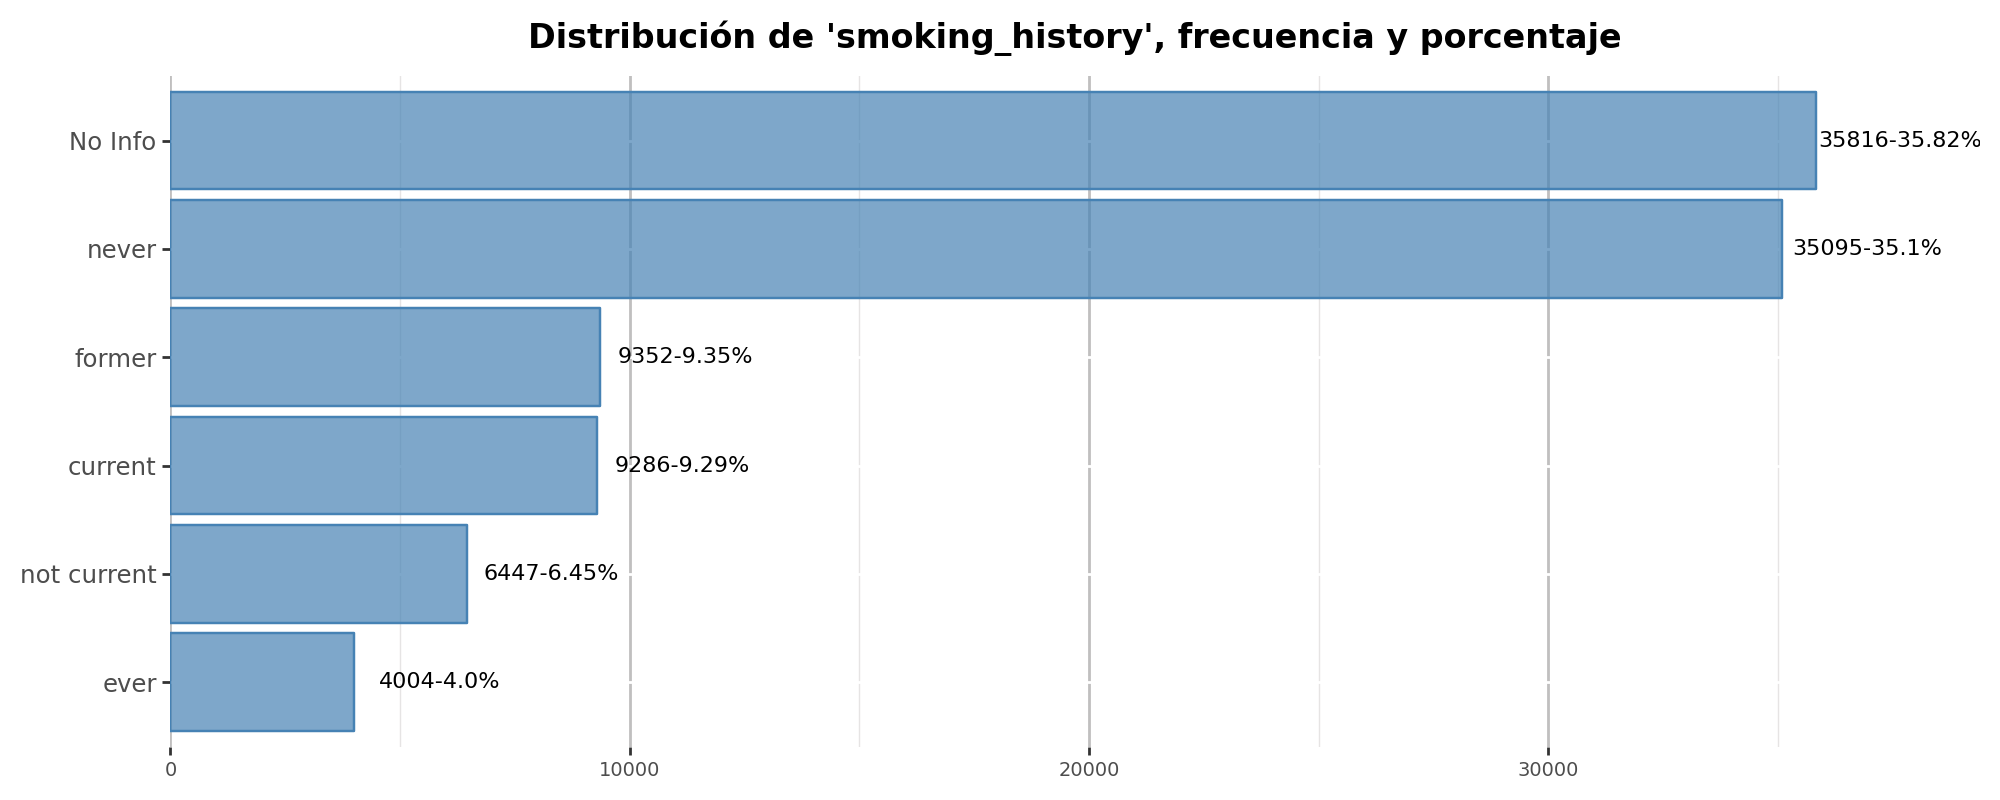

In [34]:
col = categoric_var[1]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,1850)
bar_plot.show()

Podemos ver que hay una gran cantidad de falta de información. Un tercio de la información de esta variable es desconocida (No info). En cuanto a nuestras variables que son similares, vemos que hay una cierta homogeneidad en el conteo, dentro del mismo orden de magnitud. Sin embargo, sí que vemos claras diferencias entre aquellos que declaran ser fumadores ($\sim 9000$) y los que no han fumado nunca ($\sim 35,000$).

### diabetes (variable objetivo)

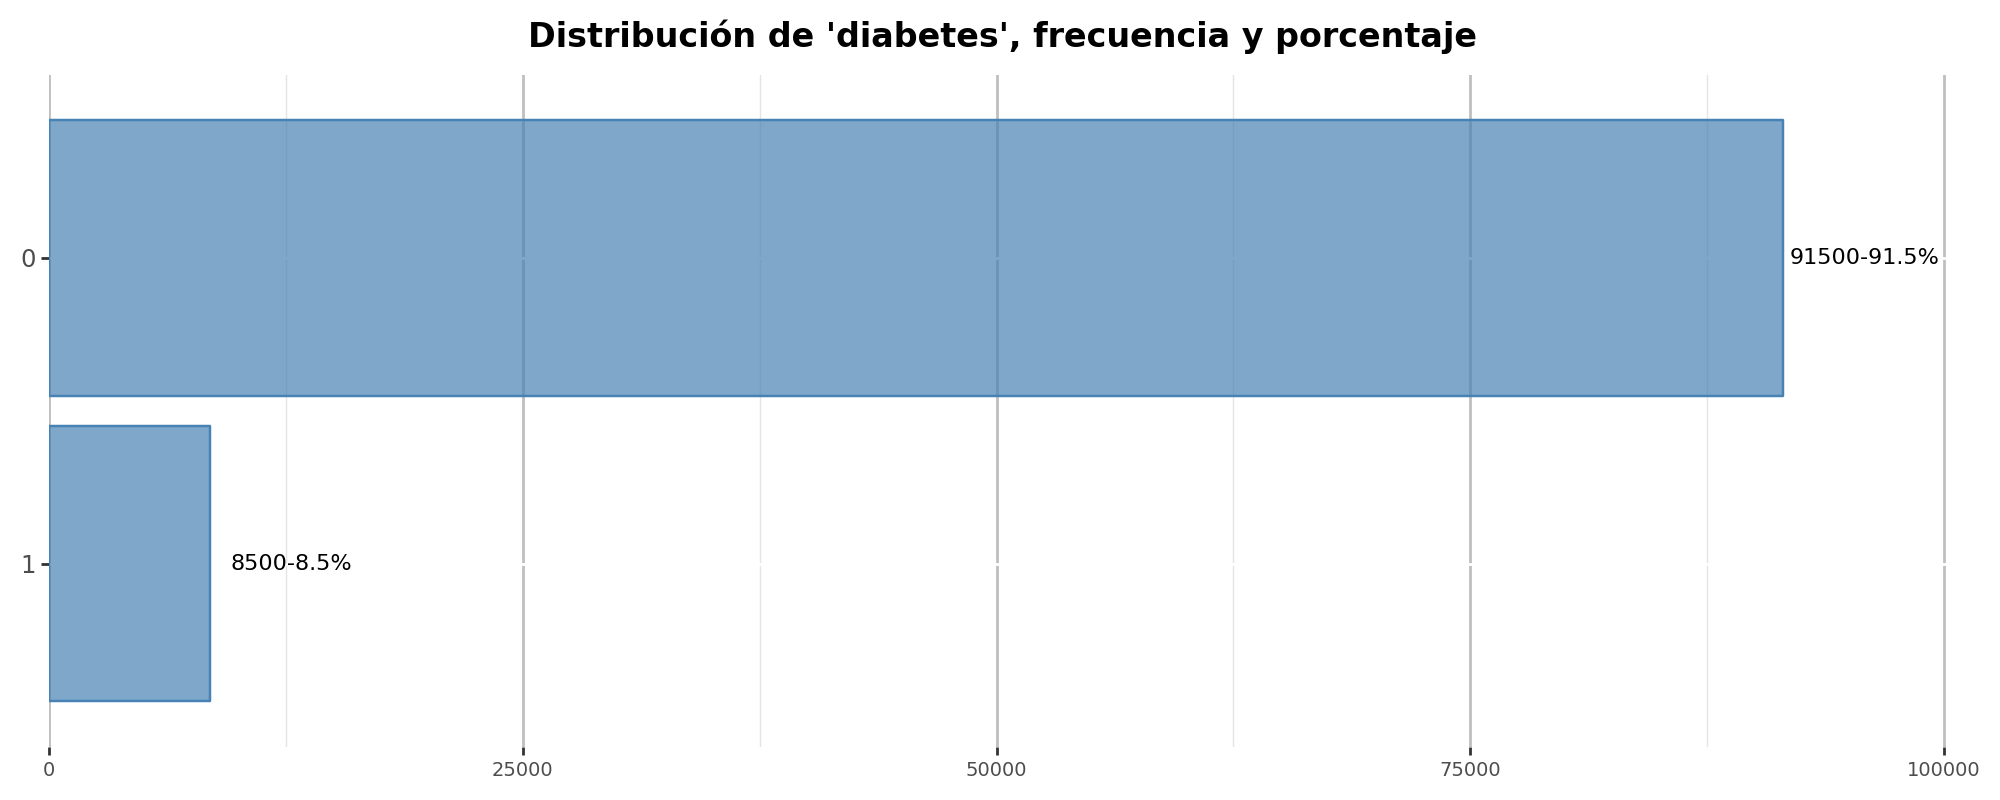

In [35]:
col = categoric_var[2]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,4300)
bar_plot.show()

- La prevalencia de diabetes en el dataset es baja (~8.5%).
- La variable objetivo está claramente **desbalanceada**, con predominio de no diabéticos.
- La distribución es coherente con un escenario de cribado poblacional.

### hypertension

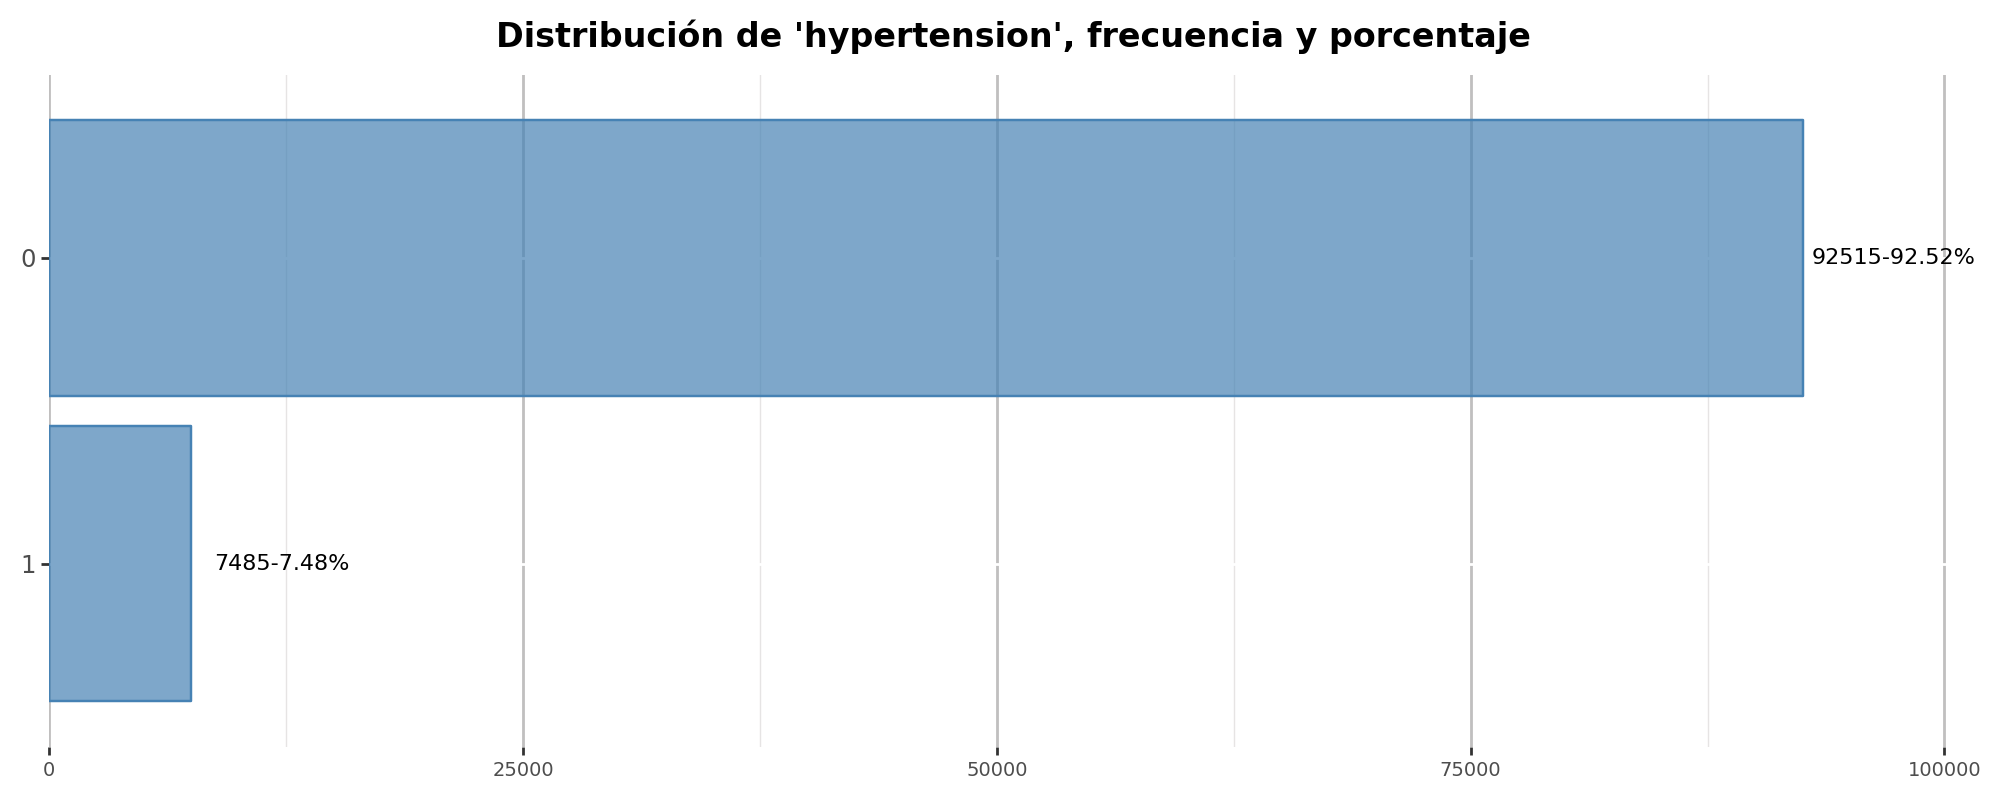

In [38]:
col = categoric_var[3]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,4800)
bar_plot.show()

- La hipertensión presenta una prevalencia baja (~7.5%) en el dataset.
- La variable está **desbalanceada**, con clara mayoría de individuos sin hipertensión.
- La frecuencia observada es clínicamente plausible para una población general.
- La baja prevalencia sugiere que la hipertensión puede actuar como **factor de riesgo**, no como característica dominante.
- La variable es informativa, pero su efecto deberá evaluarse en combinación con otras variables en el análisis bi-variante.

### heart_disease

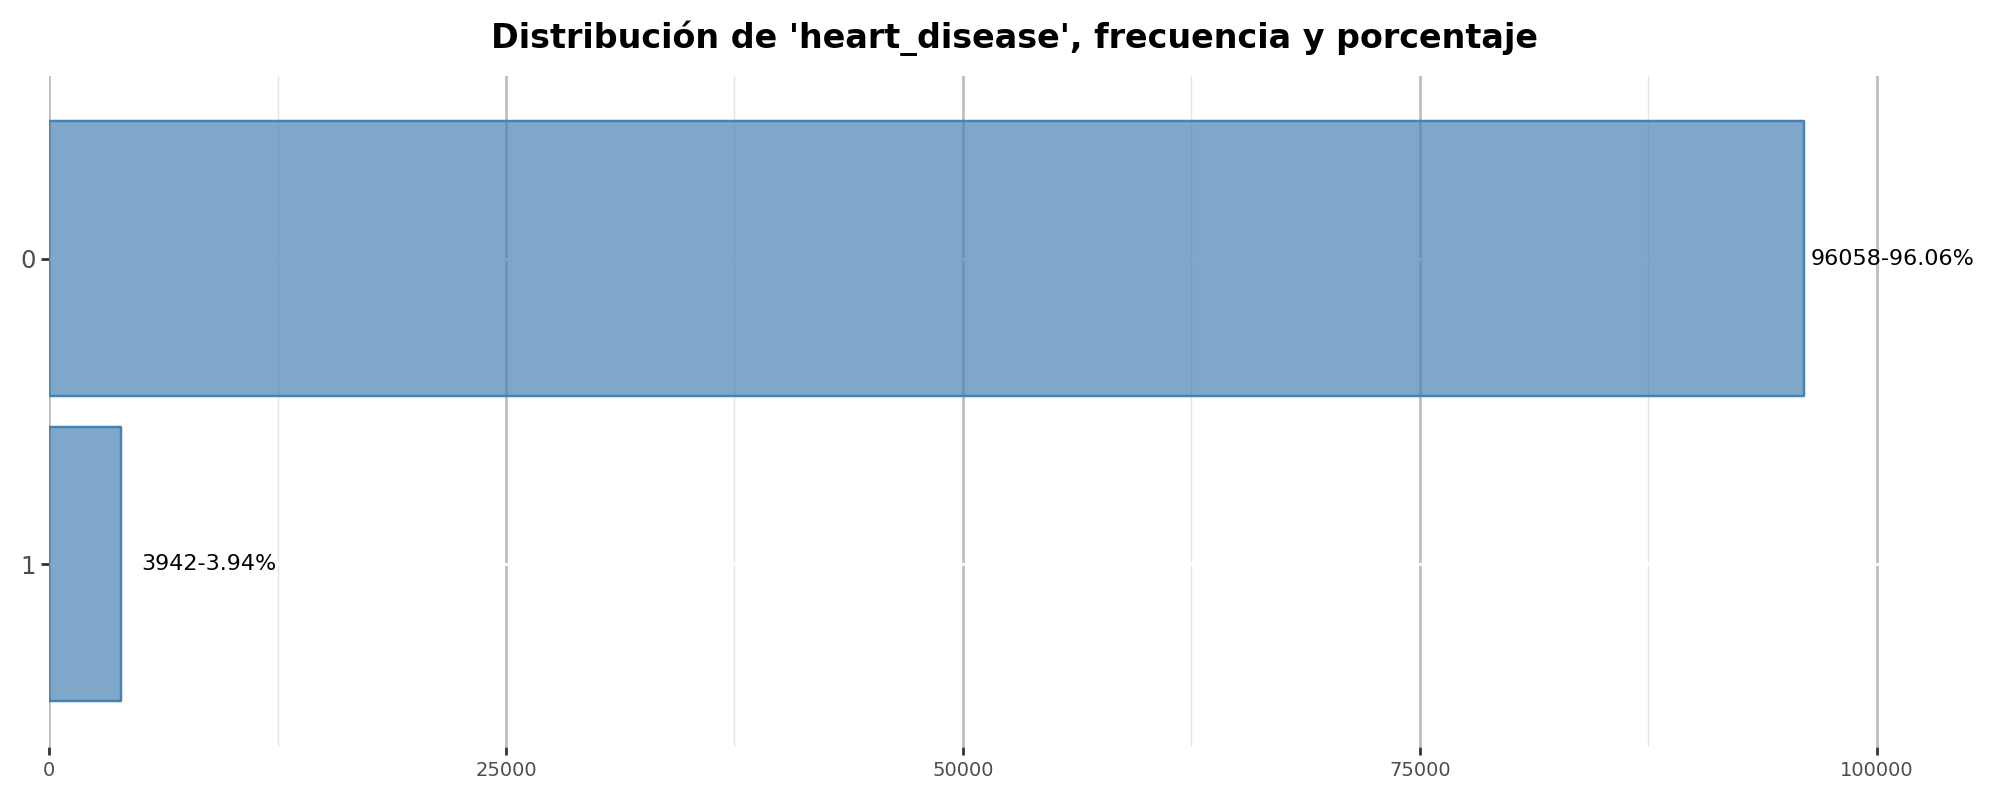

In [39]:
col = categoric_var[4]
bar_plot = ut.bar_plot(data, col,color_general,fig_size,4800)
bar_plot.show()

- La enfermedad cardíaca presenta una **prevalencia muy baja** (~3.9%) en el dataset.
- La variable está fuertemente **desbalanceada**, con una clara mayoría de individuos sin patología cardíaca.
- La frecuencia observada es coherente clínicamente para una población general.
- Al tratarse de una condición poco frecuente, su impacto aislado puede ser limitado, pero **puede aportar señal relevante en combinación con otras variables**.
- Será importante vigilar posibles celdas con baja frecuencia en análisis bivariantes y tests estadísticos.


### Acciones a realizar posterior al análisis univariante.

En consecuencia de lo observado, se toman las siguientes decisiones
- Eliminar la clase **Other** en la variable de gender, ya que las observaciones son muy pocas 0.02%.
- hypertension y heart_disease, serán tratadas de ahora en adelante como variables categóricas binarias (0,1).
- Se discretizara utilizando optimal binning, las variables HbA1c_level y blood_glucose_level, ya que al no ser variables continuas y dada la cantidad de observaciones y el modelo buscar clasificar pacientes con diabetes o sin diabetes, decidimos transformarla a categórica.

In [ ]:
data = data[data['gender']!='Other'].copy()
## Agregar el optimal binning, para las columnas HbA1c_level y blood_glucose_level

(99982, 9)

In [45]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [5]:
# se eliminan los generos distintos de Female, Male
data = data[(data['gender'].isin(['Female','Male']))].copy()

In [6]:
data.smoking_history.value_counts()

smoking_history
No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: count, dtype: int64

In [7]:
#Lets merge 'former', 'not current' and 'ever' because these may overlap one each other
smoking_map = {
    'No Info':'unknown',
    'never':'never',
    'former':'former',
    'current':'current',
    'not current':'former',
    'ever':'former'
}

data['smoking_history'] = data.smoking_history.map(smoking_map)


In [8]:
# Revisamos las estadisticas de las columnas con variables numericas
data.select_dtypes(include='number').describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Se sospecha que 'hypertension','heart_disease','diabetes' son categoricas

In [9]:
for col in ['hypertension','heart_disease','diabetes']:
    print(data['heart_disease'].value_counts(dropna=False))



heart_disease
0    96040
1     3942
Name: count, dtype: int64
heart_disease
0    96040
1     3942
Name: count, dtype: int64
heart_disease
0    96040
1     3942
Name: count, dtype: int64


Efectivamente son variable categoricas, se transforman a boolean

In [10]:
# Se transforman a booleano
data['heart_disease'] = data['heart_disease'].astype(bool)
data['hypertension'] = data['hypertension'].astype(bool)
data['diabetes'] = data['diabetes'].astype(bool)

Revisamos nuevamente las variables numericas

In [11]:
data.select_dtypes(include='number')

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155
...,...,...,...,...
99995,80.0,27.32,6.2,90
99996,2.0,17.37,6.5,100
99997,66.0,27.83,5.7,155
99998,24.0,35.42,4.0,100


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  bool   
 3   heart_disease        99982 non-null  bool   
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  bool   
dtypes: bool(3), float64(3), int64(1), object(2)
memory usage: 5.6+ MB


In [13]:
# Con las correciones realizadas segmentamos las variables en continuas y discretas
continuous_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
discrete_columns = [col for col in data.columns if not col in continuous_columns]

### Exploración Grafica, Histogramas de la población completa

Graficamos las variables continuas

c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:623: PlotnineWarning: Saving 4 x 3 in image.
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:624: PlotnineWarning: Filename: <_io.BytesIO object at 0x0000016299A39210>
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:623: PlotnineWarning: Saving 4 x 3 in image.
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:624: PlotnineWarning: Filename: <_io.BytesIO object at 0x000001629C93F100>
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.venv\Lib\site-packages\plotnine\ggplot.py:623: PlotnineWarning: Saving 4 x 3 in image.
c:\Daniel\Education\2025-09_AFI_Master_Data_Science\2026-02-08 Trabajo_En_Equipo_1\.v

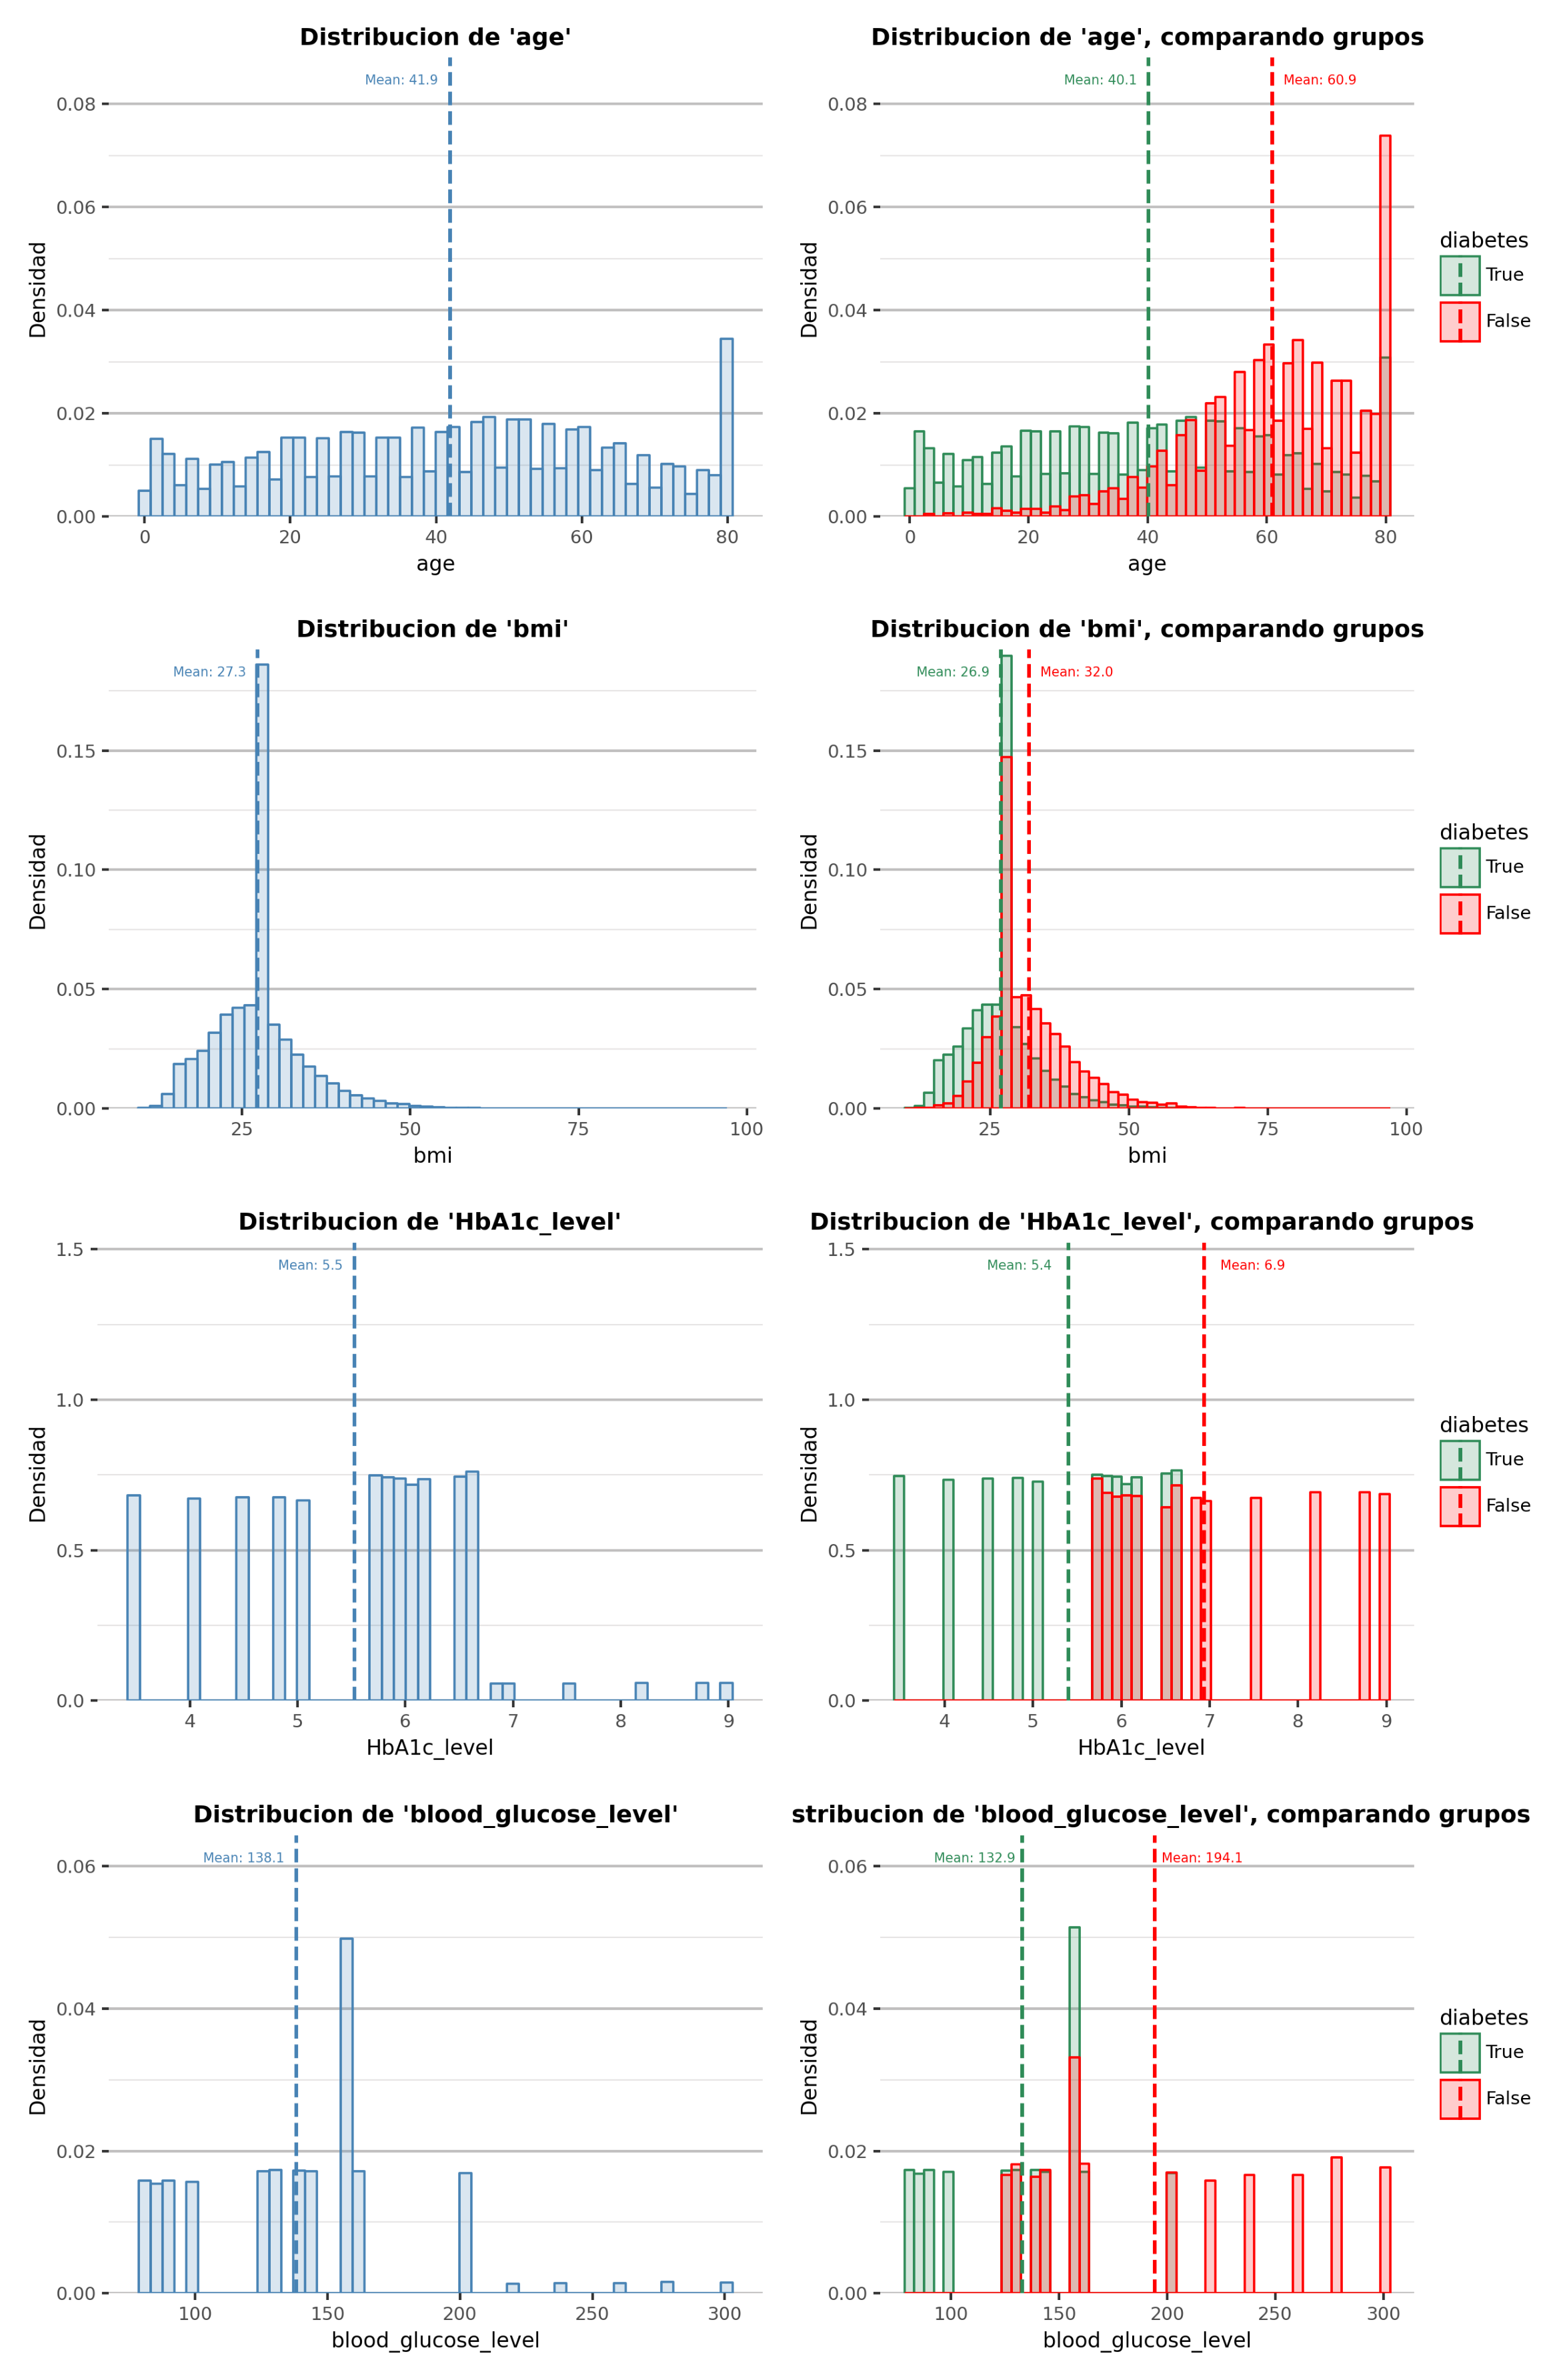

In [14]:
importlib.reload(ut)
# Plot histograms separated by diabetes diagnostic
continuous_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
colors_per_group = {True:'red', False:'seagreen'}
color_general = 'steelblue'
target_col = 'diabetes'
all_plots=[]
# Subplot size
subplot_size = (4,3)
rows_grid =4
columns_grid = 2
# grid size
grid_size = ut.get_grid_size(subplot_size,rows_grid,columns_grid)

for col in continuous_columns:
    y_max_plot = ut.get_y_max_plot(data,col,target_col)
    # Plot histograms by all rows
    plot_all = ut.plot_all_data(data,col,color_general,subplot_size,y_max_plot)
    all_plots.append(plot_all)
    # Plot histograms separated by diabetes diagnostic
    plot_grouped = ut.plot_per_group_data(data,col,target_col,colors_per_group,subplot_size,y_max_plot)
    all_plots.append(plot_grouped)

# Create a figure for 4x2 grid
fig, axes = plt.subplots(rows_grid, columns_grid, figsize=grid_size,dpi=300)

for ax, p in zip(axes.flatten(),all_plots):
    buf = io.BytesIO()
    p.save(buf, format='png',dpi=300)      # Save plot to in-memory buffer
    buf.seek(0)
    img = plt.imread(buf)
    ax.imshow(img)
    ax.axis('off')  # hide axes

plt.tight_layout()
plt.show()    

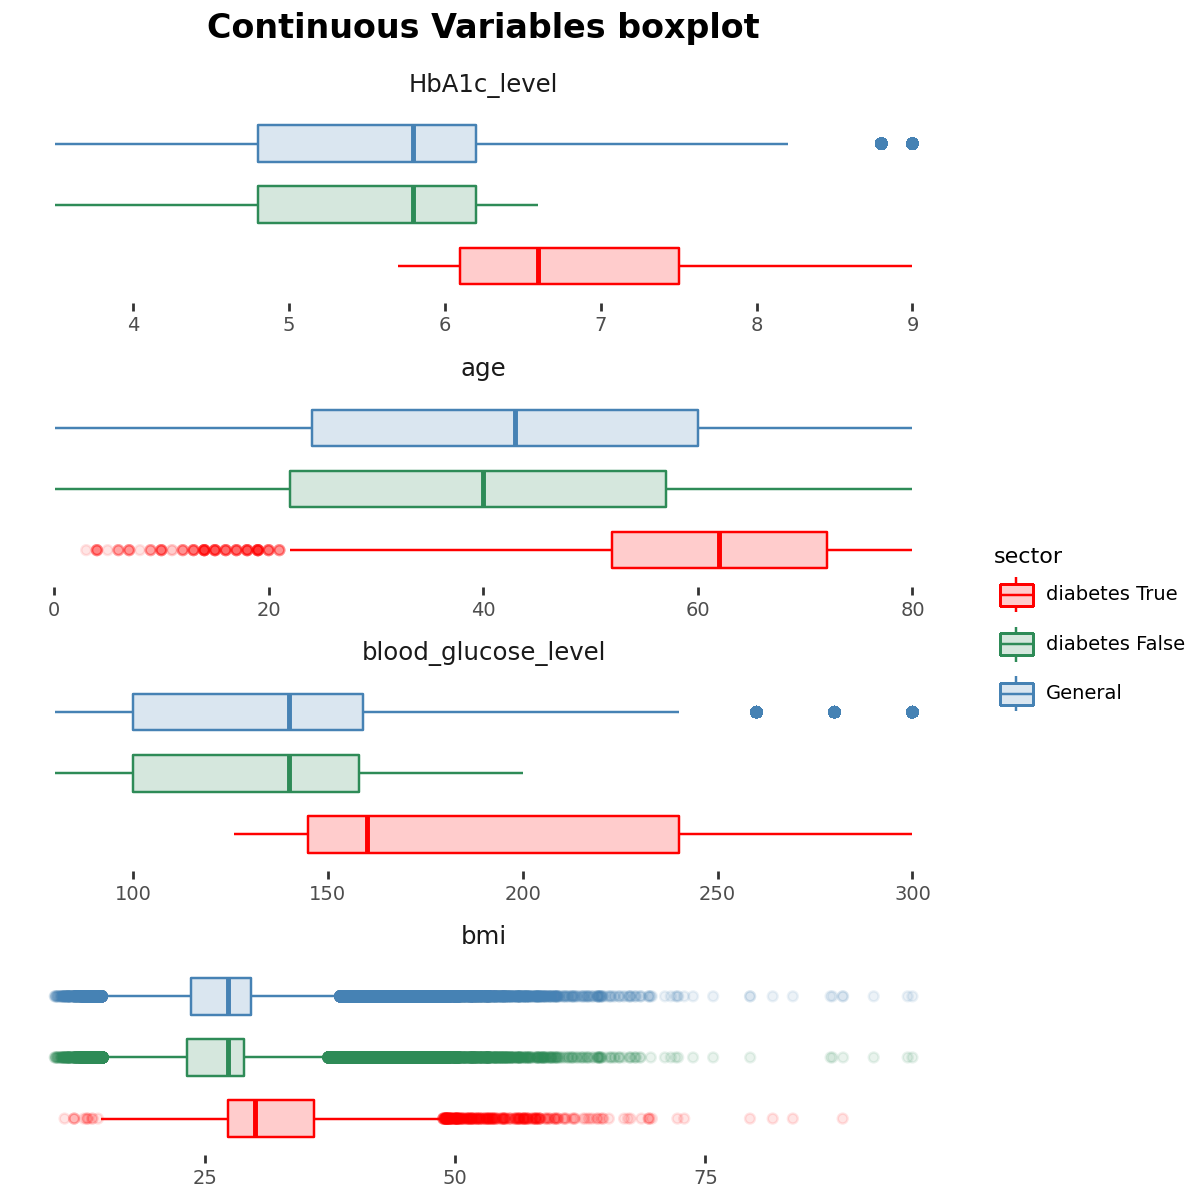

In [ ]:
# Dibujamos los boxplot por cada variable continua
importlib.reload(ut)
continuous_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
target_var = 'diabetes'
colors = {'General':'steelblue', 'diabetes False':'seagreen', 'diabetes True':'red'}
fig_size = (6,6)

ut.box_plot_continuous(data,continuous_columns,target_var,fig_size,colors).show()

In [93]:
discrete_cols = ['diabetes','gender', 'hypertension', 'heart_disease', 'smoking_history']

In [225]:
summary_discretes = pd.DataFrame({'category':pd.Series(dtype='str'),'freq':[],'variable':[]})
for col in discrete_cols:
    summ_col = data[col].value_counts().reset_index(name='freq')
    summ_col['variable'] = col
    summ_col = summ_col.rename(columns={col:'category'})
    summary_discretes = pd.concat([summary_discretes,summ_col], ignore_index=True)

summary_discretes['category'] = summary_discretes['category'].astype(str)
summary_discretes = summary_discretes.sort_values(by=['variable','freq'],ascending=[True,False])  

summary_discretes


,category,freq,variable
0,False,91482.0,diabetes
1,True,8500.0,diabetes
2,Female,58552.0,gender
3,Male,41430.0,gender
6,False,96040.0,heart_disease
7,True,3942.0,heart_disease
4,False,92497.0,hypertension
5,True,7485.0,hypertension
8,unknown,35810.0,smoking_history
9,never,35092.0,smoking_history


In [234]:
summary_discretes.groupby('variable').apply(lambda g: (g['category'].tolist(), g['category'].tolist()))
summary_discretes.category.tolist()
summary_discretes.category.tolist()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12392\1967353380.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


['False',
 'True',
 'Female',
 'Male',
 'False',
 'True',
 'False',
 'True',
 'unknown',
 'never',
 'former',
 'current']

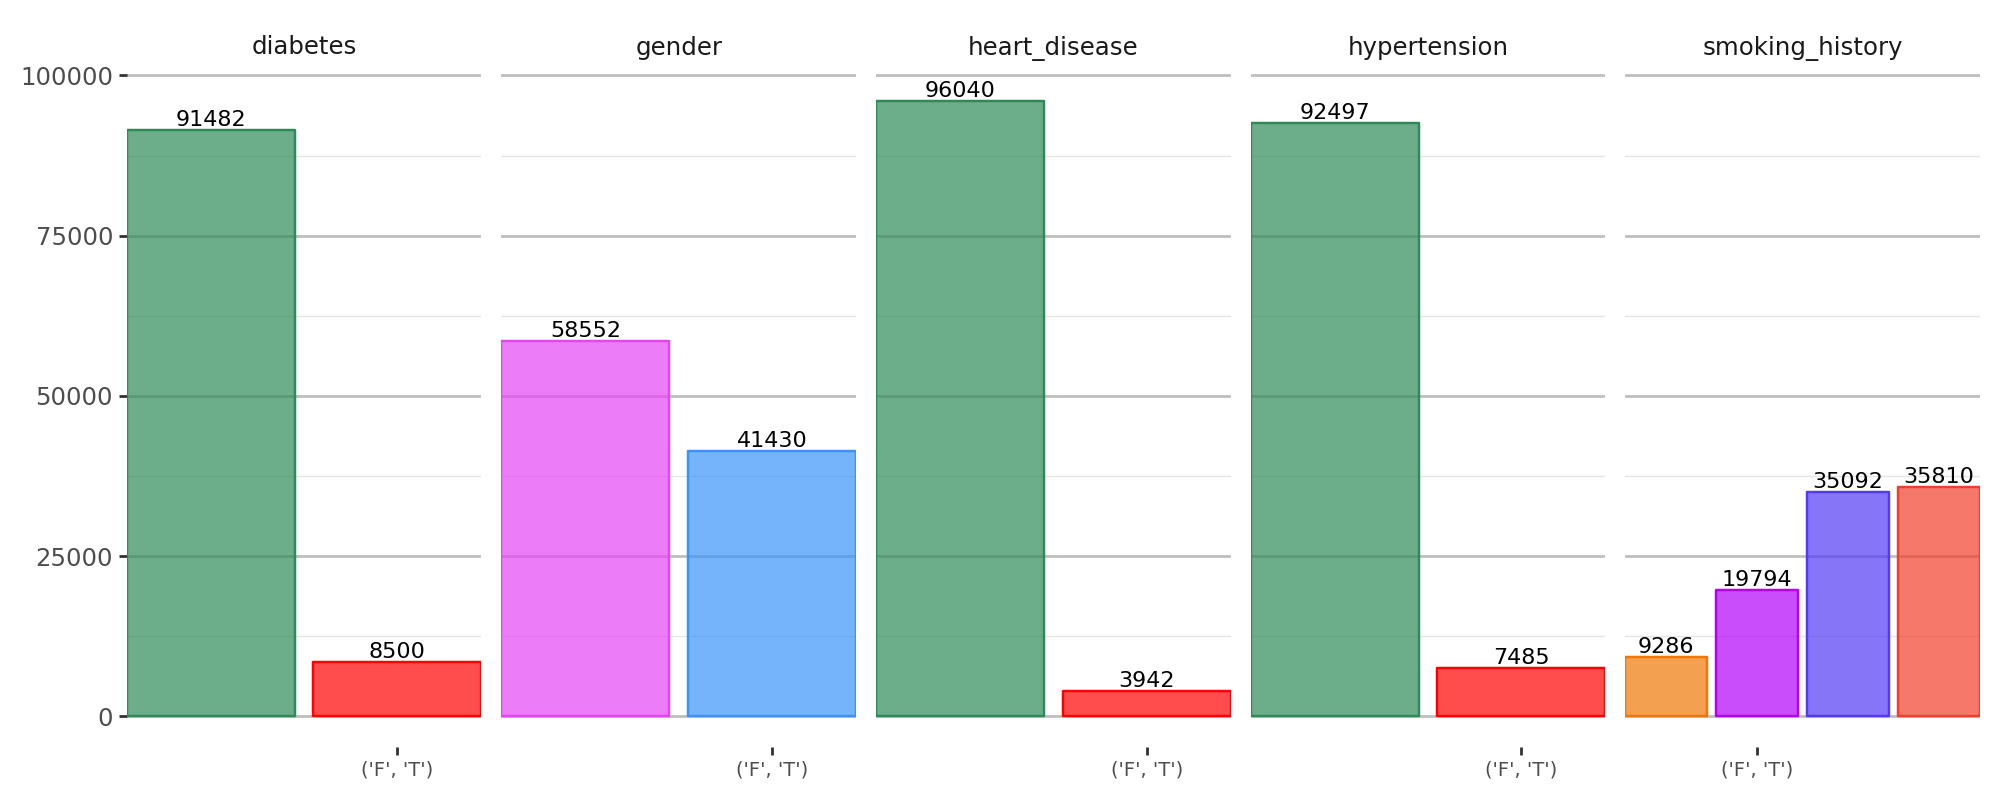

In [ ]:
fig_size = (10,4)
colors = {'Female':'#e643f5',
          'Male':'#3993fa',
          'False':'seagreen',
          'True':'red',
          'current': "#F07706",
          'former':  "#b200f9",
          'never':   "#533af5",
          'unknown': "#f23e2a",         
}


x_ticks_positions = [('False', 'True')]
x_ticks_labels=[('F', 'T')]

(
    p9.ggplot(summary_discretes, p9.aes(x='category', y='freq', fill='category',color='category',label='freq'))
    +p9.geom_col(
        show_legend = False,
        alpha = 0.7
    )
    + p9.geom_text(
        p9.aes(label='freq'),
        va='bottom',
        format_string='{:.0f}',
        nudge_y=0.05,
        show_legend= False,
        size = 8,
        color = 'black'
    )    
    + p9.facet_grid('~variable',scales='free_x')
    + p9.scale_fill_manual(colors)
    + p9.scale_color_manual(colors)
    + p9.scale_y_continuous(expand=(0.05, 0))
    + p9.scale_x_discrete(expand=(0,0), breaks=x_ticks_positions, labels=x_ticks_labels)
    + p9.theme(
        panel_background=p9.element_rect(fill="#ffffff"),
        plot_background=p9.element_rect(fill='#ffffff'),
        strip_background=p9.element_rect(fill='#ffffff'),
        panel_grid_major_y=p9.element_line(color="#c0bfbf"),
        panel_grid_minor_y=p9.element_line(color="#e6e4e4ff"),
        axis_text_x=p9.element_text(size=7),
        axis_title_x=p9.element_blank(),
        axis_title_y=p9.element_blank(),
        plot_title=p9.element_text(size=12, weight="bold"),
        legend_title=p9.element_text(size=8),
        legend_text=p9.element_text(size=7),
        figure_size=fig_size
    )
).show()

In [ ]:
# Realizar graficos de barras por cada variable categorica y mostrar la incidencia del siniestro en cada clase
# Kruska-Wallis, continua vs target
# Chi-cuadrado, categorica vs target